# <a id='toc1_'></a>[Analyze and Prepare data using Python](#toc0_)

Lesson: 12

Time: 00:00:00

**Table of contents**<a id='toc0_'></a>    
- [Analyze and Prepare data using Python](#toc1_)    
  - [NumPy](#toc1_1_)    
  - [Pandas](#toc1_2_)    
  - [Data Loading and Storage](#toc1_3_)    
  - [Data Cleaning](#toc1_4_)    
    - [Handling _Missing data_](#toc1_4_1_)    
      - [Remove/Drop Missing values:](#toc1_4_1_1_)    
      - [`fillna`: Filling in Missing Data](#toc1_4_1_2_)    
      - [Removing Duplicates:](#toc1_4_1_3_)    
      - [Replacing values](#toc1_4_1_4_)    
    - [Cut](#toc1_4_2_)    
    - [Outliers Detection](#toc1_4_3_)    
    - [Take (Shuffle rows)](#toc1_4_4_)    
    - [Sample](#toc1_4_5_)    
    - [Generating data](#toc1_4_6_)    
  - [Merging Datasets](#toc1_5_)    
    - [Merge:](#toc1_5_1_)    
    - [Merging on index:](#toc1_5_2_)    
    - [Join](#toc1_5_3_)    
      - [Join three dataframe:](#toc1_5_3_1_)    
    - [Concat](#toc1_5_4_)    
    - [Combine first](#toc1_5_5_)    
    - [Pivot](#toc1_5_6_)    
    - [Melt](#toc1_5_7_)    
  - [Visualization](#toc1_6_)    
    - [Plot with matplotlib](#toc1_6_1_)    
      - [Plot](#toc1_6_1_1_)    
      - [Scatter](#toc1_6_1_2_)    
      - [Bar Plot](#toc1_6_1_3_)    
      - [Histogram](#toc1_6_1_4_)    
        - [Normal distribution density plot:](#toc1_6_1_4_1_)    
      - [Pie plot](#toc1_6_1_5_)    
      - [Box plot](#toc1_6_1_6_)    
    - [Plotting with pandas](#toc1_6_2_)    
      - [Bar plot](#toc1_6_2_1_)    
      - [Box plot](#toc1_6_2_2_)    
      - [Box plot with `plot.box`](#toc1_6_2_3_)    
    - [Ploting with Seaborn _(is beautiful)_](#toc1_6_3_)    
      - [iris dataset example:](#toc1_6_3_1_)    
        - [Violin plot](#toc1_6_3_1_1_)    
  - [Group By](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

Import needed packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## <a id='toc1_1_'></a>[NumPy](#toc0_)

A array of given shape and type, filled with `fill_value`:

In [6]:
np.full(shape=(2, 3), fill_value=6)


array([[6, 6, 6],
       [6, 6, 6]])

Identity matrix/array:

In [7]:
np.identity(n=3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Change typing:

In [13]:
x = np.array([1.0, 3.2, 0.8, 4.0, 7.98])
print(x)
print(x.astype(np.int64))


[1.   3.2  0.8  4.   7.98]
[1 3 0 4 7]


In [14]:
y = np.array([1, 3, 0, 4, 7])
print(y)
print(y.astype(np.float64))


[1 3 0 4 7]
[1. 3. 0. 4. 7.]


_Slice_ and _change_ the original array value:

In [41]:
arr = np.arange(10)
print(arr)  # The original values of arr

x = arr[2:6]
print(x)
print()

x[1] = 17
print(x)
print(arr)  # The values of the array after Slicing and changing the value
print()

x[:] = 64
print(x)
print(arr)  # The values of the array after Slicing and changing the value


[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5]

[ 2 17  4  5]
[ 0  1  2 17  4  5  6  7  8  9]

[64 64 64 64]
[ 0  1 64 64 64 64  6  7  8  9]


But with use the `copy()`:

In [40]:
arr = np.arange(10)
print(arr)  # The original values of arr

x = arr[2:6].copy()
print(x)
print()

x[1] = 17
print(x)
print(arr)  # The values of the array after Slicing and changing the value
print()

x[:] = 64
print(x)
print(arr)  # The values of the array after Slicing and changing the value


[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5]

[ 2 17  4  5]
[0 1 2 3 4 5 6 7 8 9]

[64 64 64 64]
[0 1 2 3 4 5 6 7 8 9]


Boolean indexing _(Return True values of a array on other array)_:

In [65]:
names = np.array(['ali', 'sara', 'taha', 'ali'])
print(names)
print(names == 'ali')


['ali' 'sara' 'taha' 'ali']
[ True False False  True]


In [66]:
data = np.random.randint(low=10, size=(4, 3))
print(data)
print()

print(data[names == 'ali'])
print()

print(~data[names == 'ali'])  # ~ is Not symbol


[[6 2 6]
 [3 9 8]
 [8 8 7]
 [8 2 6]]

[[6 2 6]
 [8 2 6]]

[[-7 -3 -7]
 [-9 -3 -7]]


In [67]:
print(data[names == 'ali', 1:])


[[2 6]
 [2 6]]


In [68]:
mask1 = (names == 'ali') | (names == 'taha')
mask2 = (names == 'ali') & (names == 'taha')

print(mask1)
print(data[mask1])
print()

print(mask2)
print(data[mask2])


[ True False  True  True]
[[6 2 6]
 [8 8 7]
 [8 2 6]]

[False False False False]
[]


Convert Negative values to Zero:

In [78]:
x = np.random.randn(3, 4)
print(x)
print()

x[x < 0] = 0
print(x)


[[ 0.77211152 -0.76597199  0.75102038  0.33594753]
 [-0.68683318  1.85224896  0.75384187  1.84777921]
 [-0.25003729  1.63777146  0.89882982 -0.60706259]]

[[0.77211152 0.         0.75102038 0.33594753]
 [0.         1.85224896 0.75384187 1.84777921]
 [0.         1.63777146 0.89882982 0.        ]]


Fancy indexing (_Indexing using integer arrays_):

In [99]:
# Create data
arr = np.empty(shape=(5, 3))

for i in range(arr.shape[0]):  # arr.shape[0] == 5
    arr[i] = 5*i+1  # is a arbitrary value

print(arr)


[[ 1.  1.  1.]
 [ 6.  6.  6.]
 [11. 11. 11.]
 [16. 16. 16.]
 [21. 21. 21.]]


In [104]:
# Fancy indexing (with use the two brackets)
print(arr[[0, 2, -2, -5, -3, 1]])


[[ 1.  1.  1.]
 [11. 11. 11.]
 [16. 16. 16.]
 [ 1.  1.  1.]
 [11. 11. 11.]
 [ 6.  6.  6.]]


A new type of Slicing:

In [115]:
a = np.arange(35).reshape((7, 5))
print(a)
print()

# First bracket is Row numbers and second is Column numbers
print(a[[6, 0, 2], [2, 4, 3]])
print()

print(a[[2, 6]][:, [0, 3, 1]])


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]

[32  4 13]

[[10 13 11]
 [30 33 31]]


Transposing arrays and Swapping axes:

In [119]:
arr = np.arange(8).reshape((2, 4))
print(arr)
print()

print(arr.T)  # Transpose


[[0 1 2 3]
 [4 5 6 7]]

[[0 4]
 [1 5]
 [2 6]
 [3 7]]


In [124]:
z = np.arange(60).reshape((3, 4, 5))  # 3*4*5 == 60
print(z)
print()

print(z.shape)


[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]

(3, 4, 5)


In [127]:
# Axes swapping
axe = z.swapaxes(0, 1)  # change the Original axes: (3, 4, 5) -> (4, 3, 5)
print(axe)
print()

print(axe.shape)


[[[ 0  1  2  3  4]
  [20 21 22 23 24]
  [40 41 42 43 44]]

 [[ 5  6  7  8  9]
  [25 26 27 28 29]
  [45 46 47 48 49]]

 [[10 11 12 13 14]
  [30 31 32 33 34]
  [50 51 52 53 54]]

 [[15 16 17 18 19]
  [35 36 37 38 39]
  [55 56 57 58 59]]]

(4, 3, 5)


In [129]:
# A way same with z.swapaxes(0, 1)
print(z.transpose((1, 0, 2)))


[[[ 0  1  2  3  4]
  [20 21 22 23 24]
  [40 41 42 43 44]]

 [[ 5  6  7  8  9]
  [25 26 27 28 29]
  [45 46 47 48 49]]

 [[10 11 12 13 14]
  [30 31 32 33 34]
  [50 51 52 53 54]]

 [[15 16 17 18 19]
  [35 36 37 38 39]
  [55 56 57 58 59]]]


Separation of Decimal and Integer part:

In [132]:
x = np.array([2.6, 8.5, -9])

d, i = np.modf(x)

print(np.modf(x))
print(d)  # Decimal part
print(i)  # Integer part


(array([ 0.6,  0.5, -0. ]), array([ 2.,  8., -9.]))
[ 0.6  0.5 -0. ]
[ 2.  8. -9.]


Maximum Values of Multiple arrays:

In [135]:
x = np.random.randn(4)
y = np.random.randn(4)

print(x)
print(y)
print()

print(np.maximum(x, y))  # x and y must be have same length


[-0.06623655  0.55547904 -2.48191337  2.92861181]
[-0.17258407  1.05849755  0.39515491  0.09070186]

[-0.06623655  1.05849755  0.39515491  2.92861181]


Where ( `np.where()` ):

In [140]:
# without Where function (is bad)
arr1 = np.array([1, 5, 8])
arr2 = np.array([4, 7, 12])
condition = np.array([True, False, True])

r = [(x if cond else y) for x, y, cond in zip(arr1, arr2, condition)]

print(r)


[1, 7, 8]


In [142]:
# with Where function (is good)
res = np.where(condition, arr1, arr2)  # arr1 If condition Else arr2
print(res)


[1 7 8]


another example:

In [165]:
x = np.random.randn(2, 3)
print(x)
print()

print(x > 0)
print()

print(np.where(x > 0, 13, -1))  # 13 If x > 0 Else -1
print()

print(np.where(x > 0, 1, x))  # 1 If x > 0 Else x


[[ 0.72039162 -0.74075494 -0.7425139 ]
 [-0.02910374  0.62051568 -0.96183579]]

[[ True False False]
 [False  True False]]

[[13 -1 -1]
 [-1 13 -1]]

[[ 1.         -0.74075494 -0.7425139 ]
 [-0.02910374  1.         -0.96183579]]


Mathematical and Statistical methods:

In [20]:
arr = np.array([7, 8, -2, 4, 2, 3, 1])

print(np.sort(arr))


[-2  1  2  3  4  7  8]


In [21]:
print(np.max(arr))  # Return the maximum of an array.
print(np.amax(arr))  # Return the maximum of an array.
print(np.argmax(arr))  # Returns the indices of the maximum values.


8
8
1


In [23]:
# Calculations on an array that has missing values (NaN)
x = np.array([1, 4, np.nan, 8, 7, np.nan, 2])

print(np.mean(x))  # Use mean func (is bad)
print(np.nanmean(x))  # NanMean func, ignoring NaN values (is good)
print()

print(np.max(x))  # is bad
print(np.nanmax(x))  # is good
print()

print(np.sum(x))  # is bad
print(np.nansum(x))  # is good
print()

print(np.var(x))  # is bad
print(np.nanvar(x))  # is good

# and ...


nan
4.4

nan
8.0

nan
22.0

nan
7.44


In [38]:
# Some of Statistical functions
y = np.array([3, 5, 9, 8, 1, 4, 17, 6])

print(np.var(y))
print()

print(np.std(y))
print()

print(np.mean(y))  # Arithmetic mean.
print()

print(np.average(y, weights=[2, 1, 4, 3, 3, 1, 0.6, 3]))  # Weighted mean.
print()

print(np.median(y))
print()

# q value: Percentile or sequence of percentiles to compute, which must be between 0 and 1 inclusive.
print(np.quantile(y, q=0.25))
print(np.quantile(y, q=[0, 0.25, 0.3, 0.5, 0.75, 1]))
print()

# q value: Percentile or sequence of percentiles to compute, which must be between 0 and 100 inclusive.
print(np.percentile(y, q=25))
print(np.percentile(y, q=[0, 25, 30, 50, 75, 100]))

# and ...


21.234375

4.608077147791691

6.625

6.034090909090909

5.5

3.75
[ 1.    3.75  4.1   5.5   8.25 17.  ]

3.75
[ 1.    3.75  4.1   5.5   8.25 17.  ]


In [40]:
# Sum and CumSum
arr = np.array([1, 2, 3, 4])

print(np.sum(arr))  # sum.
print()

print(np.cumsum(arr))  # Cumulative sum of the elements.


10

[ 1  3  6 10]


Another example:

In [50]:
x = np.arange(1, 10).reshape((3, 3))
print(x)
print()

print(np.sum(x, axis=0))  # Sum of Columns
print()

print(np.sum(x, axis=1))  # Sum of Rows
print()

print(np.cumsum(x, axis=0))  # CumSum of Columns
print()

print(np.cumsum(x, axis=1))  # CumSum of Rows
print()

print(np.prod(x, axis=0))  # Product of Columns
print()

print(np.cumprod(x, axis=0))  # CumProd of Columns
print()


[[1 2 3]
 [4 5 6]
 [7 8 9]]

[12 15 18]

[ 6 15 24]

[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]

[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]

[ 28  80 162]

[[  1   2   3]
 [  4  10  18]
 [ 28  80 162]]



`all()` and `any()` function:

In [54]:
a = np.array([True, True, False])

print(a.any())  # Is at least one of elements true?
print(np.any(a))
print()

print(a.all())  # Are all elements True?
print(np.all(a))

# in above code, a is numpy array and all/any is inner python function.


True
True

False
False


In [58]:
b = [0, 2, -3]  # in True/False ->  [False, True, True]

print(np.all(b))
print()

print(np.any(b))
print()

print(b.all())  # error
print(b.any())  # error


False

True



AttributeError: 'list' object has no attribute 'all'

Unique function:

In [65]:
arr = np.array([1, 4, 7, 5, 5, 4, 1, 3, 5])

print(np.unique(arr))
print()

print(np.unique(arr, return_index=True))
print()

print(np.unique(arr, return_counts=True))


[1 3 4 5 7]

(array([1, 3, 4, 5, 7]), array([0, 7, 1, 3, 2], dtype=int64))

(array([1, 3, 4, 5, 7]), array([2, 1, 2, 3, 1], dtype=int64))


more in `sort` function:

In [71]:
data = [('alex', 17.5, 35), ('sara', 15.75, 27), ('tomas', 16.25, 27)]
print(data)
print(type(data))
print()

# name and type of any columns
dtype = [('name', 'S10'), ('score', float), ('age', int)]

arr = np.array(data, dtype=dtype)
print(type(arr))
print()

print(np.sort(arr, order='name'))
print(np.sort(arr, order='score'))
print(np.sort(arr, order='age'))
print()

print(np.sort(arr, order=['age', 'score']))


[('alex', 17.5, 35), ('sara', 15.75, 27), ('tomas', 16.25, 27)]
<class 'list'>

<class 'numpy.ndarray'>

[(b'alex', 17.5 , 35) (b'sara', 15.75, 27) (b'tomas', 16.25, 27)]
[(b'sara', 15.75, 27) (b'tomas', 16.25, 27) (b'alex', 17.5 , 35)]
[(b'sara', 15.75, 27) (b'tomas', 16.25, 27) (b'alex', 17.5 , 35)]

[(b'sara', 15.75, 27) (b'tomas', 16.25, 27) (b'alex', 17.5 , 35)]


`in1d` function:

In [78]:
x = np.array([0, 7, 1, 4, 2, 5, 7])
y = np.array([3, 4, 7])

print(np.in1d(x, y))
print(np.in1d(x, y, invert=True))
print()

print(x[np.in1d(x, y)])  # What x elements are in the y?
print(x[np.in1d(x, y, invert=True)])  # What x elements are not in the y?

[False  True False  True False False  True]
[ True False  True False  True  True False]

[7 4 7]
[0 1 2 5]


Save and Load:

In [55]:
a = np.array([4,6,9])

np.save(file='myfile.npy', arr=a)  #Save an array to a binary file in NumPy .npy format.

In [56]:
x = np.load(file='myfile.npy')  # Load arrays or pickled objects from .npy, .npz or pickled files.

print(x)

[4 6 9]


the best way for handle file:

In [57]:
# Save
with open(file='myfile.npy', mode='wb') as f:  # mode wb: Write Binary
    np.save(file=f, arr=a)

In [58]:
# Load
with open(file='myfile.npy', mode='rb') as f:  # mode rb: Read Binary
    x = np.load(file=f)
    
print(x)

[4 6 9]


Close the open file:

In [59]:
f.close()  # The close() method closes an open file.

Save in `txt` or `csv` file _(is slow)_:

In [63]:
arr = np.array([1.02, 5.3, 7, 3.1574])

np.savetxt('myfile.csv', X=arr, delimiter=',', fmt='%0.2f')  # Save an array to a text, csv and etc. file.

In [64]:
d = np.loadtxt('myfile.csv', delimiter=',')  # Load data from a text, csv and etc. file.

print(d)

[1.02 5.3  7.   3.16]


Save several arrays:

In [60]:
arr1 = np.array([1, 2])
arr2 = np.array([3, 4, 5])

np.savez('myfile.npz', x=arr1, y=arr2)  # Save several arrays into a single file in uncompressed .npz format.

In [61]:
data = np.load('myfile.npz')  # Load arrays or pickled objects from .npy, .npz or pickled files.

print(data)
print()

print(data.files)
print()

print(data['x'])
print(data['y'])


['x', 'y']

[1 2]
[3 4 5]


Close the open file:

In [62]:
data.close()

`inner` and `outer` product:

In [91]:
a = np.array([1, 2, 3])
b = np.array([5, 6, 0])

# 1*5 + 2*6 + 3*0 == 17
print(np.inner(a, b))  # Inner product of two arrays.
print()

print(np.outer(a, b))  # Compute the outer product of two vectors.


17

[[ 5  6  0]
 [10 12  0]
 [15 18  0]]


In [93]:
x = np.array([[1, 2], 
              [3, 4]])

y = np.array([[5, 6], 
              [7, 8]])


print(np.dot(x, y))  # Dot product of two arrays.
print()

print(x @ y)  # Dot product of two arrays.

[[19 22]
 [43 50]]

[[19 22]
 [43 50]]


`inverse` and `pseudo-inverse` of a matrix: 

In [94]:
# Compute the (multiplicative) inverse of a matrix:
print(np.linalg.inv(x))
print()

# Compute the (Moore-Penrose) pseudo-inverse of a matrix:
print(np.linalg.pinv(x))

[[-2.   1. ]
 [ 1.5 -0.5]]

[[-2.   1. ]
 [ 1.5 -0.5]]


Compute the `qr factorization` of a matrix:

In [112]:
m = np.array([[1, 2], 
              [3, 4]])

print(m)

[[1 2]
 [3 4]]


In [114]:
q, r = np.linalg.qr(m)  # Compute the qr factorization of a matrix.

print(q)
print()
print(r)

[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]

[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]


In [115]:
print(np.allclose(m, np.dot(q, r)))  # m does equal qr.

True


## <a id='toc1_2_'></a>[Pandas](#toc0_)

Series:

In [123]:
a = pd.Series([12, 8, 19, 17])

print(a)

0    12
1     8
2    19
3    17
dtype: int64


In [162]:
score = pd.Series([12, 8, 19, 17],
              index=['ali', 'taha', 'sara', 'omid'])

print(score)

ali     12
taha     8
sara    19
omid    17
dtype: int64


In [163]:
score = score.reindex(['ali', 'reza', 'sara', 'omid'])

print(score)

ali     12.0
reza     NaN
sara    19.0
omid    17.0
dtype: float64


In [164]:
print(score['ali'])
print(score[2])

12.0
19.0


In [165]:
score['reza'] = 20

print(score)

ali     12.0
reza    20.0
sara    19.0
omid    17.0
dtype: float64


In [166]:
print(score.index)
print()

print(score.values)
print()

Index(['ali', 'reza', 'sara', 'omid'], dtype='object')

[12. 20. 19. 17.]



In [167]:
score.index.name = 'Names'

print(score)

Names
ali     12.0
reza    20.0
sara    19.0
omid    17.0
dtype: float64


In [168]:
score.name = 'Grade'

print(score)

Names
ali     12.0
reza    20.0
sara    19.0
omid    17.0
Name: Grade, dtype: float64


Drop Row:

In [169]:
score = score.drop(['omid', 'sara'])

print(score)

Names
ali     12.0
reza    20.0
Name: Grade, dtype: float64


Pop:

In [170]:
myser = pd.Series([12, 4, 5, 7, 2],
                  index=['a', 'b', 'c', 'd', 'e'])

print(myser)

a    12
b     4
c     5
d     7
e     2
dtype: int64


In [171]:
myser.pop('c')  # Return item and drops from series. Raise KeyError if not found.

5

In [172]:
print(myser)

a    12
b     4
d     7
e     2
dtype: int64


Missing values:

In [199]:
s = pd.Series([12, 4, 5, np.nan, 7, 2],
                  index=['a', 'b', 'c', 'd', 'e', 'f'])

print(s)

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64


In [200]:
print(s.isna())
print()

print(s.isna().sum())  # NaN values count

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

1


In [201]:
print(s.notna())
print()

print(s.notna().sum())  # not NaN values count

a     True
b     True
c     True
d    False
e     True
f     True
dtype: bool

5


In [202]:
print(s.isin([5]))

a    False
b    False
c     True
d    False
e    False
f    False
dtype: bool


Sort:

In [209]:
print(s.sort_values(ascending=False))

a    12.0
e     7.0
c     5.0
b     4.0
f     2.0
d     NaN
dtype: float64


In [210]:
print(s)

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64


Rank of values:

In [207]:
print(s.rank())

a    5.0
b    2.0
c    3.0
d    NaN
e    4.0
f    1.0
dtype: float64


Duplicate indices/rows:

In [211]:
d = pd.Series([12, 4, 5, 7, 2],
                  index=['a', 'b', 'a', 'd', 'e'])

print(d)

a    12
b     4
a     5
d     7
e     2
dtype: int64


In [212]:
print(d['a'])

a    12
a     5
dtype: int64


In [213]:
print(d.index.is_unique)

False


In [214]:
print(d.describe())  # Generate descriptive statistics.

count     5.000000
mean      6.000000
std       3.807887
min       2.000000
25%       4.000000
50%       5.000000
75%       7.000000
max      12.000000
dtype: float64


in describe:

In [222]:
print(d.count())
print(d.mean())
print()

print(d.quantile([0.25, 0.5, 0.75, 0.8]))

5
6.0

0.25    4.0
0.50    5.0
0.75    7.0
0.80    8.0
dtype: float64


Condition:

In [227]:
print(d)

a    12
b     4
a     5
d     7
e     2
dtype: int64


In [228]:
print(d >= 5)

a     True
b    False
a     True
d     True
e    False
dtype: bool


In [229]:
print(d.where(d >= 5))

a    12.0
b     NaN
a     5.0
d     7.0
e     NaN
dtype: float64


Remove duplicate rows:

In [236]:
myser = pd.Series(['a', 'a', 'b', 'e', 'f',  'a', 'f', 'd'])

print(myser)

0    a
1    a
2    b
3    e
4    f
5    a
6    f
7    d
dtype: object


In [237]:
print(myser.duplicated())
print()

print(myser.duplicated().sum())

0    False
1     True
2    False
3    False
4    False
5     True
6     True
7    False
dtype: bool

3


`keep : {'first', 'last', False}`\
_default 'first'_
    Method to handle dropping duplicates:

- `'first'` : Drop duplicates except for the first occurrence.
- `'last'` : Drop duplicates except for the last occurrence.
- `False` : Drop all duplicates.

In [238]:
myser.drop_duplicates()  # Return Series with duplicate values removed.

0    a
2    b
3    e
4    f
7    d
dtype: object

In [239]:
print(myser)

0    a
1    a
2    b
3    e
4    f
5    a
6    f
7    d
dtype: object


In [240]:
myser.drop_duplicates(keep='last')

2    b
3    e
5    a
6    f
7    d
dtype: object

`prefix` and `suffix`:

In [241]:
s = pd.Series([1, 2, 3, 4])
print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [242]:
s.add_prefix('item_')

item_0    1
item_1    2
item_2    3
item_3    4
dtype: int64

In [244]:
s.add_prefix('item: ')

item: 0    1
item: 1    2
item: 2    3
item: 3    4
dtype: int64

In [246]:
s.add_suffix('_item')

0_item    1
1_item    2
2_item    3
3_item    4
dtype: int64

In [248]:
w = s.add_suffix('_item')
print(w)

0_item    1
1_item    2
2_item    3
3_item    4
dtype: int64


Calculate on rows:

In [251]:
a = pd.Series([1, 10, 3], index=['a', 'b', 'c'])
b = pd.Series([4, 5, 6], index=['a', 'b', 'd'])


print(a + b)
print()

print(a * b)
print()

print(a.mod(b))

# and other math operations.

a     5.0
b    15.0
c     NaN
d     NaN
dtype: float64

a     4.0
b    50.0
c     NaN
d     NaN
dtype: float64

a    1.0
b    0.0
c    NaN
d    NaN
dtype: float64


In [253]:
# NaN values fill by 0
print(a.add(b, fill_value=0))  # a + b
print()

print(a.multiply(b, fill_value=0))  # a * b

# and other math operations.

a     5.0
b    15.0
c     3.0
d     6.0
dtype: float64

a     4.0
b    50.0
c     0.0
d     0.0
dtype: float64


Comparison operators:
- `eq`: Equal.
- `ne`: Not equal.
- `gt`: Greater than.
- `ge`: Greater equal. 
- `lt`: Less than.
- `le`: Less equal.

In [4]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 1])

In [10]:
print(s1.eq(s2))  # same with s1 == s2

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool


In [11]:
print(s1.gt(s2))  # same with s1 > s2

0    False
1    False
2     True
3    False
4     True
5     True
dtype: bool


In [13]:
print(s1.ge(s2))  # same with s1 >= s2

0    False
1     True
2     True
3     True
4     True
5     True
dtype: bool


`argmax` and `argmin`:

In [14]:
score = pd.Series({'Java': 15,
                   'C++': 20,
                   'Python': 12,
                   'Pascal': 9})

print(score)

Java      15
C++       20
Python    12
Pascal     9
dtype: int64


In [22]:
print(score.argmax())
print(score.idxmax())  # Return the row label of the maximum value.
print(score.max())

1
C++
20


In [23]:
print(score.argmin())
print(score.idxmin())  # Return the row label of the minimum value.
print(score.min())

3
Pascal
9


_Cumulative sum_ and _Cumulative product_:

In [24]:
s = pd.Series([3, 2, np.nan, 5, 0])
print(s)

0    3.0
1    2.0
2    NaN
3    5.0
4    0.0
dtype: float64


In [26]:
print(s.cumsum())

0     3.0
1     5.0
2     NaN
3    10.0
4    10.0
dtype: float64


In [27]:
print(s.cumprod())

0     3.0
1     6.0
2     NaN
3    30.0
4     0.0
dtype: float64


Value count:

In [28]:
myser = pd.Series(['c', 'a', 'd', 'a', 'a', 'c', 'b', 'b', 'c', 'c'])
print(myser)

0    c
1    a
2    d
3    a
4    a
5    c
6    b
7    b
8    c
9    c
dtype: object


In [32]:
print(myser.value_counts())

c    4
a    3
b    2
d    1
dtype: int64


or:

In [33]:
print(pd.value_counts(myser))

c    4
a    3
b    2
d    1
dtype: int64


Unique values:

In [34]:
print(myser.unique())

['c' 'a' 'd' 'b']


or:

In [37]:
print(pd.unique(myser))

['c' 'a' 'd' 'b']


Append:

In [40]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 1])

In [41]:
print(s1.append(s2))

0     8
1     2
2    12
3     6
4     5
5     4
0    20
1     2
2     7
3     6
4     2
5     1
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2597536150.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(s1.append(s2))


or _(is better)_:

In [47]:
print(pd.concat([s1, s2], ignore_index=True))

0      8
1      2
2     12
3      6
4      5
5      4
6     20
7      2
8      7
9      6
10     2
11     1
dtype: int64


Combine:

In [48]:
s1 = pd.Series({'ali': 16, 'sara': 17})
s2 = pd.Series({'ali': 18, 'sara': 15, 'taha': 19})

Combine the Series with a Series or scalar according to `func`.

In [56]:
print(s1.combine(s2, func=max))

ali     18.0
sara    17.0
taha     NaN
dtype: float64


In [57]:
print(s1.combine(s2, func=max, fill_value=0))

ali     18
sara    17
taha    19
dtype: int64


In [58]:
print(s1.combine(s2, func=min))

ali     16.0
sara    15.0
taha     NaN
dtype: float64


In [59]:
print(s1.combine(s2, func=min, fill_value=0))

ali     16
sara    15
taha     0
dtype: int64


apply:

In [66]:
myser = pd.Series([10, 5, 100])
print(s)

0     10
1      5
2    100
dtype: int64


`apply`: Invoke function on values of Series.


In [67]:
print(myser.apply(func=np.log10))

0    1.00000
1    0.69897
2    2.00000
dtype: float64


In [70]:
print(myser.apply(func=np.sqrt))

0     3.162278
1     2.236068
2    10.000000
dtype: float64


In [72]:
def f(x):
    return x**2

print(myser.apply(f))

0      100
1       25
2    10000
dtype: int64


Or can use the below code _(but above codes is better)_:

In [75]:
print(np.sqrt(myser))
print()

print(f(myser))

0     3.162278
1     2.236068
2    10.000000
dtype: float64

0      100
1       25
2    10000
dtype: int64


Using by `lambda` function:

In [76]:
lam = lambda x: x**2

print(myser.apply(lam))

0      100
1       25
2    10000
dtype: int64


Transform:

In [89]:
ser = pd.Series([10, 4, 9])
print(ser)

0    10
1     4
2     9
dtype: int64


In [90]:
ser.transform([np.sqrt, np.log10])

,sqrt,log10
0,3.162278,1.000000
1,2.000000,0.602060
2,3.000000,0.954243


`agg` _(Aggregate)_:

Aggregate using one or more operations over the specified axis.

In [97]:
ser = pd.Series([10, 4, 9, 2, 18, 6])
print(ser)

0    10
1     4
2     9
3     2
4    18
5     6
dtype: int64


In [105]:
print(ser.agg(['min', 'max', 'mean', 'var', 'std']))

min      2.000000
max     18.000000
mean     8.166667
var     32.166667
std      5.671567
dtype: float64


n Largest values:

In [106]:
data = {'a': 6, 'b': 3, 'c': 8, 'd': 5,
        'e': 9, 'f': 3, 'g': 5, 'h': 4, 'i': 5}

myser = pd.Series(data)
print(myser)

a    6
b    3
c    8
d    5
e    9
f    3
g    5
h    4
i    5
dtype: int64


In [114]:
print(myser.nlargest(4))  # Return the largest n (default=5) elements.

e    9
c    8
a    6
d    5
dtype: int64


In [113]:
print(myser.nlargest(4, keep='last'))


e    9
c    8
a    6
i    5
dtype: int64


n Smallest values:

In [115]:
print(myser.nsmallest())

b    3
f    3
h    4
d    5
g    5
dtype: int64


Group by:

In [127]:
cars_name = ['BMW', 'BMW', 'Benz', 'Benz']
speed = [220, 180, 230, 200]

data = pd.Series(speed, index=cars_name, name='Max Speed')
print(data)

BMW     220
BMW     180
Benz    230
Benz    200
Name: Max Speed, dtype: int64


In [129]:
print(data.groupby(cars_name).max())

BMW     220
Benz    230
Name: Max Speed, dtype: int64


In [130]:
print(data.groupby(cars_name).mean())

BMW     200.0
Benz    215.0
Name: Max Speed, dtype: float64


Between:

`Between`: return boolean Series equivalent to _left <= series <= right_:

In [131]:
s = pd.Series([15, 9, 18, 20])
print(s)

0    15
1     9
2    18
3    20
dtype: int64


In [132]:
print(s.between(10, 20))

0     True
1    False
2     True
3     True
dtype: bool


Drop Na:

In [133]:
s = pd.Series([7, 2, np.nan, 18, 34, np.nan])
print(s)

0     7.0
1     2.0
2     NaN
3    18.0
4    34.0
5     NaN
dtype: float64


In [134]:
print(s.dropna(inplace=False))

0     7.0
1     2.0
3    18.0
4    34.0
dtype: float64


Pandas series to other Types:

In [151]:
ser = pd.Series([15, 9, 18, 20])

print(type(ser))
print(ser)

<class 'pandas.core.series.Series'>
0    15
1     9
2    18
3    20
dtype: int64


- `.to_numpy()`
- `.to_csv()`
- `.to_dict()`
- `.to_clipboard()`
- and ...

example:

In [152]:
arr = ser.to_numpy()

print(type(arr))
print(arr)

<class 'numpy.ndarray'>
[15  9 18 20]


In [153]:
dict = ser.to_dict()

print(type(dict))
print(dict)

<class 'dict'>
{0: 15, 1: 9, 2: 18, 3: 20}


Numpy array to Pandas series:

In [154]:
ser = pd.Series(arr)

print(type(ser))
print(ser)

<class 'pandas.core.series.Series'>
0    15
1     9
2    18
3    20
dtype: int64


Replace:

In [175]:
s = pd.Series([15, 9, 9, 18, 9, 20])
print(s)

0    15
1     9
2     9
3    18
4     9
5    20
dtype: int64


In [176]:
print(s.replace(to_replace=9, value=10, inplace=False))

0    15
1    10
2    10
3    18
4    10
5    20
dtype: int64


Repeat:

In [163]:
s = pd.Series([15, 9, 18, 9, 20])
print(s)

0    15
1     9
2    18
3     9
4    20
dtype: int64


In [177]:
print(s.repeat(2))

0    15
0    15
1     9
1     9
2     9
2     9
3    18
3    18
4     9
4     9
5    20
5    20
dtype: int64


Multi index:

In [192]:
cars = [['BMW', 'BMW', 'Benz', 'Benz'],
        ['A', 'B', 'A', 'B']]

speed = [220, 180, 230, 200]

In [193]:
mi = pd.MultiIndex.from_arrays(cars, names=('Machine', 'Class'))
data = pd.Series(speed, index=mi)

print(data)

Machine  Class
BMW      A        220
         B        180
Benz     A        230
         B        200
dtype: int64


Group by _Machine_:

In [195]:
data.groupby(level='Machine').max()

Machine
BMW     220
Benz    230
dtype: int64

In [197]:
data.groupby(level=0).max()

Machine
BMW     220
Benz    230
dtype: int64

Group by _Class_:

In [196]:
data.groupby(level='Class').max()

Class
A    230
B    200
dtype: int64

In [198]:
data.groupby(level=1).max()

Class
A    230
B    200
dtype: int64

Data frame:

In [7]:
data = {'Python': [12, 13, 12, 20],
        'C++': [20, 14, 8, 16],
        'Java': [18, 6, 19, 9]}

index = ['Ali', 'Sara', 'Taha', 'Reza']

df = pd.DataFrame(data, index=index)
df

,Python,C++,Java
Ali,12,20,18
Sara,13,14,6
Taha,12,8,19
Reza,20,16,9


add Row and Column name:

In [33]:
df.index.name = 'Students'
df.columns.name = 'Programming'

df

Programming,Python,C++,Java
Students,,,
Ali,12,20,18
Sara,13,14,6
Taha,12,8,19
Reza,20,16,9


`apply` function:

In [34]:
df.apply(lambda x: x+2)  # x+2 for all values in every columns.

Programming,Python,C++,Java
Students,,,
Ali,14,22,20
Sara,15,16,8
Taha,14,10,21
Reza,22,18,11


Calculate statistics func on dataframe:

In [35]:
def myfunc(x):
    return pd.Series([x.min(), x.max(), x.mean()],
                     index=['Min', 'Max', 'Mean'])

df.apply(myfunc)

Programming,Python,C++,Java
Min,12.00,8.0,6.0
Max,20.00,20.0,19.0
Mean,14.25,14.5,13.0


`map` function:

Map values of Series according to an input mapping or function:

In [36]:
df['Python'].map(lambda x: x+2)  # # x+2 for all values in only Python column.

Students
Ali     14
Sara    15
Taha    14
Reza    22
Name: Python, dtype: int64

`apply map` function:

In [37]:
df.applymap(lambda x: f'{x:.3f}')

Programming,Python,C++,Java
Students,,,
Ali,12.000,20.000,18.000
Sara,13.000,14.000,6.000
Taha,12.000,8.000,19.000
Reza,20.000,16.000,9.000


In [38]:
df.applymap(lambda x: x+2)

Programming,Python,C++,Java
Students,,,
Ali,14,22,20
Sara,15,16,8
Taha,14,10,21
Reza,22,18,11


In [39]:
df.applymap(lambda x: len(str(x)))

Programming,Python,C++,Java
Students,,,
Ali,2,2,2
Sara,2,2,1
Taha,2,1,2
Reza,2,2,1


`empty` function:

In [40]:
df.empty  # If Series/DataFrame is empty, return True, if not return False.

False

`set index` function:

In [48]:
frame = pd.DataFrame({'C++': [6, 7, 4, 16, 14, 13, 15, 7],
                      'Python': [3, 2, 5, 14, 19, 18, 16, 10],
                      'Terms': ['one', 'one', 'one', 'two', 'two', 'two', 'two', 'two'],
                      'Names': ['ali', 'reza', 'sara', 'ali', 'reza', 'sara', 'taha', 'farid']})

frame

,C++,Python,Terms,Names
0,6,3,one,ali
1,7,2,one,reza
2,4,5,one,sara
3,16,14,two,ali
4,14,19,two,reza
5,13,18,two,sara
6,15,16,two,taha
7,7,10,two,farid


In [49]:
df = frame.set_index(['Terms', 'Names'])
df

C++  Python
Terms Names             
one   ali      6       3
      reza     7       2
      sara     4       5
two   ali     16      14
      reza    14      19
      sara    13      18
      taha    15      16
      farid    7      10

`sort index`:

In [51]:
df.sort_index(level='Names')

C++  Python
Terms Names             
one   ali      6       3
two   ali     16      14
      farid    7      10
one   reza     7       2
two   reza    14      19
one   sara     4       5
two   sara    13      18
      taha    15      16

In [70]:
len(df.index.levels)  # level=0 and level=1

2

`group by` and Calculation:

In [58]:
df.mean(level=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5676\1676480961.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df.mean(level=1)


,C++,Python
Names,,
ali,11.0,8.5
reza,10.5,10.5
sara,8.5,11.5
taha,15.0,16.0
farid,7.0,10.0


In [60]:
df.groupby(level=1).mean()

,C++,Python
Names,,
ali,11.0,8.5
farid,7.0,10.0
reza,10.5,10.5
sara,8.5,11.5
taha,15.0,16.0


In [61]:
df.groupby(level=0).mean()

,C++,Python
Terms,,
one,5.666667,3.333333
two,13.000000,15.400000


`unstack` function:

`unstack`: pivot a level of the (necessarily hierarchical) index labels.

In [71]:
df.unstack()

C++                         Python                        
Names   ali farid  reza  sara  taha    ali farid  reza  sara  taha
Terms                                                             
one     6.0   NaN   7.0   4.0   NaN    3.0   NaN   2.0   5.0   NaN
two    16.0   7.0  14.0  13.0  15.0   14.0  10.0  19.0  18.0  16.0

In [74]:
df

C++  Python
Terms Names             
one   ali      6       3
      reza     7       2
      sara     4       5
two   ali     16      14
      reza    14      19
      sara    13      18
      taha    15      16
      farid    7      10

`swap axes` function:

`swapaxes`: interchange axes and swap values axes appropriately.

In [73]:
df.swapaxes('columns','index')

Terms  one           two                     
Names  ali reza sara ali reza sara taha farid
C++      6    7    4  16   14   13   15     7
Python   3    2    5  14   19   18   16    10

`swap level` function:

In [76]:
df.swaplevel('Terms', 'Names')

,,C++,Python
Names,Terms,,
ali,one,6,3
reza,one,7,2
sara,one,4,5
ali,two,16,14
reza,two,14,19
sara,two,13,18
taha,two,15,16
farid,two,7,10


## <a id='toc1_3_'></a>[Data Loading and Storage](#toc0_)

In [6]:
data = {
    'Name': ['Ali', 'Sara', 'Taha', 'Omid'],
    'Age': [27, 24, 25, 26],
    'Score': [19, 18, 20, 13]
}

df = pd.DataFrame(data)
df

,Name,Age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


Read `CSV`

In [13]:
df.to_csv('files/score.csv', index=False)

In [14]:
mydata = pd.read_csv('files/score.csv')
mydata

,Name,Age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


Read a file without header:

problem:

In [18]:
pd.read_csv('files/Course files and codes/S04/Files/student.csv')

,Ali,12,20,18
0,Sara,13,14,6
1,Taha,12,8,19
2,Mahsa,20,16,9


solution:

In [19]:
pd.read_csv('files/Course files and codes/S04/Files/student.csv', header=None)

,0,1,2,3
0,Ali,12,20,18
1,Sara,13,14,6
2,Taha,12,8,19
3,Mahsa,20,16,9


add header name:

In [20]:
pd.read_csv('files/Course files and codes/S04/Files/student.csv', names=['Name', 'Python', 'C++', 'java'])

,Name,Python,C++,java
0,Ali,12,20,18
1,Sara,13,14,6
2,Taha,12,8,19
3,Mahsa,20,16,9


`skip rows`:

In [28]:
pd.read_csv('files\\Course files and codes\\S04\\files\\age.csv')

,# Hello,shirafkan
0,name,age
1,Ali,12
2,Sara,13
3,Taha,12
4,Mahsa,20


In [29]:
pd.read_csv('files\\Course files and codes\\S04\\files\\age.csv', skiprows=[0])

,name,age
0,Ali,12
1,Sara,13
2,Taha,12
3,Mahsa,20


In [31]:
# add row 0 and 1 to one header:
pd.read_csv('files\\Course files and codes\\S04\\files\\age.csv',
            header=[0, 1])


,# Hello,shirafkan
,name,age
0,Ali,12
1,Sara,13
2,Taha,12
3,Mahsa,20


Read `table`:

Read CSV file with `read_table`:

In [32]:
pd.read_table('files/Course files and codes/S04/Files/score.csv')

,"name,age,Score"
0,"Ali,27,19"
1,"Sara,24,18"
2,"Taha,25,20"
3,"Omid,26,13"


In [34]:
pd.read_table('files/Course files and codes/S04/Files/score.csv', sep=',')

,name,age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


Read `txt` file:

In [40]:
pd.read_table('files/Course files and codes/S04/Files/mytext.txt', 
              sep='\s+')  # \s+ is Regex code.

,A,B,C
row1,1,2,3
row2,4,5,6


`n rows`:

In [41]:
path = 'files/Course files and codes/S04/Files/Alphabet.csv'
pd.read_csv(path)

,col1,col2
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6
6,G,7
7,H,8
8,I,9
9,J,10


In [61]:
# Read only 6 first rows:
df = pd.read_csv(path, nrows=6)

print(df.shape)
df

(6, 2)


,col1,col2
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6


set pandas global option:

In [62]:
# Display only 4 rows ((Must be even number), (Default=None)):
pd.options.display.max_rows = 4

pd.read_csv(path)

,col1,col2
0,A,1
1,B,2
...,...,...
24,Y,25
25,Z,26


In [64]:
# Back to default
pd.options.display.max_rows = None

`skip footer`:

In [72]:
# Skip n last rows:
pd.read_csv(path, skipfooter=22)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3748\1398562425.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pd.read_csv(path, skipfooter=22)


,col1,col2
0,A,1
1,B,2
2,C,3
3,D,4


In [71]:
# Skip n last rows:
df = pd.read_csv(path, skipfooter=22, engine='python')

print(df.shape)
df

(4, 2)


,col1,col2
0,A,1
1,B,2
2,C,3
3,D,4


`sys.stdout`:

In [74]:
import sys

In [73]:
df = pd.read_csv('files/Course files and codes/S04/Files/score.csv')
df

,name,age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


`sys.stdout` in `to_csv()`: Only display and does not save into cvs file:

In [76]:
df.to_csv(sys.stdout)

,name,age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


In [77]:
df.to_csv(sys.stdout, index=False, header=False, sep='|')

Ali|27|19
Sara|24|18
Taha|25|20
Omid|26|13


`to_excel`:

Must install `openpyxl` package with: `pip install openpyxl`

Not need to import in code.

In [78]:
df = pd.read_csv('files/Course files and codes/S04/Files/score.csv')
df

,name,age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


In [80]:
df.to_excel('files/score.xlsx', index=False)

In [82]:
pd.read_excel('files/score.xlsx')

,name,age,Score
0,Ali,27,19
1,Sara,24,18
2,Taha,25,20
3,Omid,26,13


Get file size:

In [103]:
def file_size(file_path: str) -> float:
    '''
    Return file size as Byte.
    '''
    import os
    size = os.path.getsize(file_path)
    return size


file_csv_path = 'files/score.csv'
file_excel_path = 'files/score.xlsx'

print('CSV Size:', file_size(file_csv_path), 'B')
print('Excel Size:', file_size(file_excel_path), 'B')

CSV Size: 63 B
Excel Size: 5008 B


Read `HTML`:

Must install `lxml` and `html5lib` packages with: 
- `pip install lxml`
- `pip install html5lib`

Not need to import in code.

In [7]:
path = 'files/Course files and codes/S04/Files/test.html'

lst = pd.read_html(path)

print(type(lst))
print(lst)

<class 'pandas.core.frame.DataFrame'>
[   name  score
0   Ali     12
1  Sara     18]


data frame is into `lst[0]`:

In [14]:
df = lst[0]

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,score
0,Ali,12
1,Sara,18


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   score   2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


Read html from web:

In [40]:
URL = 'https://en.wikipedia.org/wiki/minnesota'
match_table = 'United States presidential election results for Minnesota'

df = pd.read_html(URL, match=match_table)

`match`: str or compiled regular expression, optional\
The set of tables containing text matching this regex or string will be returned.

In [41]:
print(type(df))
df

<class 'list'>


[    Year Republican         Democratic         Third party        
     Year        No.       %        No.       %         No.       %
 0   2020    1484065  45.28%    1717077  52.40%       76029   2.32%
 1   2016    1323232  44.93%    1367825  46.44%      254176   8.63%
 2   2012    1320225  44.96%    1546167  52.65%       70169   2.39%
 3   2008    1275409  43.82%    1573354  54.06%       61606   2.12%
 4   2004    1346695  47.61%    1445014  51.09%       36678   1.30%
 5   2000    1109659  45.50%    1168266  47.91%      160760   6.59%
 6   1996     766476  34.96%    1120438  51.10%      305726  13.94%
 7   1992     747841  31.85%    1020997  43.48%      579110  24.66%
 8   1988     962337  45.90%    1109471  52.91%       24982   1.19%
 9   1984    1032603  49.54%    1036364  49.72%       15482   0.74%
 10  1980     873241  42.56%     954174  46.50%      224538  10.94%
 11  1976     819395  42.02%    1070440  54.90%       60096   3.08%
 12  1972     898269  51.58%     802346  46.07% 

Interacting with `Databases`:

In [43]:
import sqlite3

In [48]:
query = """ CREATE TABLE AgeTableTest (Name VARCHAR(20), age INTEGER); """

In [49]:
con = sqlite3.connect('files/Course files and codes/S04/Files/mydata.sqlite')
con.execute(query)
con.commit()

In [50]:
data = [('Ali', 37), ('Taha', 25), ('Sara', 40)]
q = "INSERT INTO AgeTableTest VALUES(?, ?)"

con.executemany(q, data)
con.commit()

In [57]:
q = 'select * from AgeTableTest'
mydata = con.execute(q)

col = [x[0] for x in mydata.description]

In [58]:
pd.DataFrame(mydata.fetchall(), columns=col)

,Name,age
0,Ali,37
1,Taha,25
2,Sara,40


`requests.get`:

In [59]:
import requests

In [60]:
URL = 'https://api.github.com/repos/pandas-dev/pandas/issues'
r = requests.get(URL)

In [61]:
type(r)

requests.models.Response

In [63]:
if r.status_code == 200:
    print('Success')
elif r.status_code == 404:
    print('Not Found!')

Success


In [68]:
df = pd.DataFrame(r.json(), columns=['number', 'title'])

print(df.shape)
df.head()

(30, 2)


,number,title
0,52661,DEPS: drop np 1.20
1,52660,BLD: remove libreduction
2,52659,REF: lazify relativedelta imports
3,52657,BUG: ArrowNotImplementedError when setting mul...
4,52656,BUG: .loc sometimes does not swap columns in m...


For `JSON`, `XML`, `PKL`, `HDF` files, view course notebook.

## <a id='toc1_4_'></a>[Data Cleaning](#toc0_)

In [3]:
from numpy import nan as NA

### <a id='toc1_4_1_'></a>[Handling _Missing data_](#toc0_)

In [4]:
s = pd.Series([3, NA, 8, NA, 5])
s

0    3.0
1    NaN
2    8.0
3    NaN
4    5.0
dtype: float64

Check for Missing values (NA):

In [5]:
s.notna()

0     True
1    False
2     True
3    False
4     True
dtype: bool

or:

In [6]:
s.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

NA Count:

In [13]:
s.notnull().sum()

3

Not NA Count:

In [12]:
(~s.notnull()).sum()

2

#### <a id='toc1_4_1_1_'></a>[Remove/Drop Missing values:](#toc0_)

In [8]:
myser = s[s.notnull()]
myser

0    3.0
2    8.0
4    5.0
dtype: float64

Or:

In [16]:
s.dropna(inplace=False)

0    3.0
2    8.0
4    5.0
dtype: float64

Work with DataFrame:

In [45]:
df = pd.DataFrame([[4, 9, 5], [2, NA, NA],
                   [NA, NA, NA], [NA, 8, 6]])

df

,0,1,2
0,4.0,9.0,5.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,8.0,6.0


In `dropna(how=?)`:
- `how='any'`: If any NA values are present, drop that row or column. _Default_.
- `how='all'`: If all values are NA, drop that row or column.

In [46]:
cleaned = df.dropna(how='any')  # Remove every rows have even one or more NA.
cleaned

,0,1,2
0,4.0,9.0,5.0


In [47]:
df

,0,1,2
0,4.0,9.0,5.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,8.0,6.0


In [48]:
df.dropna(how='all')  # Remove every rows that have all columns NA.

,0,1,2
0,4.0,9.0,5.0
1,2.0,NaN,NaN
3,NaN,8.0,6.0


Add a new column that have NA values:

In [49]:
df[4] = NA
df

,0,1,2,4
0,4.0,9.0,5.0,NaN
1,2.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,8.0,6.0,NaN


In [50]:
df.dropna(how='all', axis=1)  # axis=1 : Columns

,0,1,2
0,4.0,9.0,5.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,8.0,6.0


In [51]:
df.dropna(how='all', axis=0)  # axis=0 : Rows (Default)

,0,1,2,4
0,4.0,9.0,5.0,NaN
1,2.0,NaN,NaN,NaN
3,NaN,8.0,6.0,NaN


Another example:

In [56]:
data = [[14, NA, NA], [12, NA, NA], [18, NA, 7],
        [18, NA, 16], [15, 12, 19], [13, 1, 6]]

df = pd.DataFrame(data)
df

,0,1,2
0,14,NaN,NaN
1,12,NaN,NaN
2,18,NaN,7.0
3,18,NaN,16.0
4,15,12.0,19.0
5,13,1.0,6.0


In [53]:
df.dropna()

,0,1,2
4,15,12.0,19.0
5,13,1.0,6.0


Add a threshold for drop NA values:

`thresh`: Require that many non-NA values. _(thresh=N requires that a row/column has at least N non-NaNs to survive)._\
\
Cannot be combined with _how_.

In [74]:
df.dropna(thresh=1)  # Return rows that have 1 or more non-NA values.

,0,1,2
0,14,NaN,NaN
1,12,NaN,NaN
2,18,NaN,7.0
3,18,NaN,16.0
4,15,12.0,19.0
5,13,1.0,6.0


In [77]:
df.dropna(thresh=2)  # Return rows that have 2 or more non-NA values.

,0,1,2
2,18,NaN,7.0
3,18,NaN,16.0
4,15,12.0,19.0
5,13,1.0,6.0


In [80]:
df.dropna(thresh=3)  # Return rows that have 3 or more non-NA values.

,0,1,2
4,15,12.0,19.0
5,13,1.0,6.0


#### <a id='toc1_4_1_2_'></a>[`fillna`: Filling in Missing Data](#toc0_)

In [84]:
data = [[14, NA, NA], [12, NA, NA], [18, NA, 7],
        [18, NA, 16], [15, 12, 19], [13, 1, 6]]

df = pd.DataFrame(data)
df

,0,1,2
0,14,NaN,NaN
1,12,NaN,NaN
2,18,NaN,7.0
3,18,NaN,16.0
4,15,12.0,19.0
5,13,1.0,6.0


In [85]:
df.fillna(value=0)  # Fill NA values to 0.

,0,1,2
0,14,0.0,0.0
1,12,0.0,0.0
2,18,0.0,7.0
3,18,0.0,16.0
4,15,12.0,19.0
5,13,1.0,6.0


handle on every columns:

In [87]:
df.fillna({1: 0, 2: 9})  # fill NA in Columns1 by 0 and in Column2 by 1.

,0,1,2
0,14,0.0,9.0
1,12,0.0,9.0
2,18,0.0,7.0
3,18,0.0,16.0
4,15,12.0,19.0
5,13,1.0,6.0


In [88]:
df

,0,1,2
0,14,NaN,NaN
1,12,NaN,NaN
2,18,NaN,7.0
3,18,NaN,16.0
4,15,12.0,19.0
5,13,1.0,6.0


Another example:

In [114]:
data = [[15, 12, NA, 14], [13, 15, NA, NA], [18, 14, 7, NA],
        [18, NA, 16, NA], [14, NA, 5, 9], [12, NA, 18, 10]]

df = pd.DataFrame(data)
df

,0,1,2,3
0,15,12.0,NaN,14.0
1,13,15.0,NaN,NaN
2,18,14.0,7.0,NaN
3,18,NaN,16.0,NaN
4,14,NaN,5.0,9.0
5,12,NaN,18.0,10.0


`method`: {{'_backfill_', '_bfill_', '_pad_', '_ffill_', _None_}},\
Default _None_.\
Method to use for filling holes in reindexed Series
- `pad/ffill`: Propagate last valid observation forward to next valid.
- `backfill/bfill`: Use next valid observation to fill gap.

In [115]:
df.fillna(method='ffill')

,0,1,2,3
0,15,12.0,NaN,14.0
1,13,15.0,NaN,14.0
2,18,14.0,7.0,14.0
3,18,14.0,16.0,14.0
4,14,14.0,5.0,9.0
5,12,14.0,18.0,10.0


In [118]:
df.fillna(method='ffill', limit=2)  # add limit to fill NA values.

,0,1,2,3
0,15,12.0,NaN,14.0
1,13,15.0,NaN,14.0
2,18,14.0,7.0,14.0
3,18,14.0,16.0,NaN
4,14,14.0,5.0,9.0
5,12,NaN,18.0,10.0


In [121]:
df.fillna(method='bfill')

,0,1,2,3
0,15,12.0,7.0,14.0
1,13,15.0,7.0,9.0
2,18,14.0,7.0,9.0
3,18,NaN,16.0,9.0
4,14,NaN,5.0,9.0
5,12,NaN,18.0,10.0


In [122]:
df.fillna(method='bfill', limit=2)  # add limit to fill NA values.

,0,1,2,3
0,15,12.0,7.0,14.0
1,13,15.0,7.0,NaN
2,18,14.0,7.0,9.0
3,18,NaN,16.0,9.0
4,14,NaN,5.0,9.0
5,12,NaN,18.0,10.0


Other example:

In [123]:
s = pd.Series([6, NA, 4, NA, 5])
s

0    6.0
1    NaN
2    4.0
3    NaN
4    5.0
dtype: float64

In [124]:
s.mean()

5.0

Fill NAs by Column mean:

In [125]:
s.fillna(s.mean())

0    6.0
1    5.0
2    4.0
3    5.0
4    5.0
dtype: float64

#### <a id='toc1_4_1_3_'></a>[Removing Duplicates:](#toc0_)

In [129]:
df = pd.DataFrame({'col1': ['a', 'b', 'a', 'b', 'a', 'b', 'b'],
                      'col2': [1, 1, 2, 3, 3, 4, 4]})

df

,col1,col2
0,a,1
1,b,1
2,a,2
3,b,3
4,a,3
5,b,4
6,b,4


In [132]:
df.duplicated()  # check duplicate rows

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [135]:
df.drop_duplicates()  # drop duplicate rows

,col1,col2
0,a,1
1,b,1
2,a,2
3,b,3
4,a,3
5,b,4


In [133]:
df.duplicated(subset=['col1'])  # check duplicate values in col1

0    False
1    False
2     True
3     True
4     True
5     True
6     True
dtype: bool

In [137]:
df.drop_duplicates(subset=['col1'])  # drop rows that have duplicate values in col1

,col1,col2
0,a,1
1,b,1


In [134]:
df.duplicated(subset=['col2'])  # check duplicate value in col2

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [142]:
df.drop_duplicates(subset=['col2'])  # drop rows that have duplicate values in col2

,col1,col2
0,a,1
2,a,2
3,b,3
5,b,4


`keep=?`: Keep value and not drop:
- `keep='first'`: Keep first duplicate value.
- `keep='last'`: Keep last duplicate value.

In [150]:
# drop rows that have duplicate values in col2. And Keep last duplicate value.
df.drop_duplicates(subset=['col2'], keep='last')


,col1,col2
1,b,1
2,a,2
4,a,3
6,b,4


#### <a id='toc1_4_1_4_'></a>[Replacing values](#toc0_)

In [164]:
myser = pd.Series([13, 9, 20, 9, 18, 17])
myser

0    13
1     9
2    20
3     9
4    18
5    17
dtype: int64

In [165]:
myser.replace(9, NA)

0    13.0
1     NaN
2    20.0
3     NaN
4    18.0
5    17.0
dtype: float64

In [166]:
myser.replace({9: NA, 18: 0})  # Replace multi values

0    13.0
1     NaN
2    20.0
3     NaN
4     0.0
5    17.0
dtype: float64

Or:

In [167]:
myser.replace([9, 18], [NA, 0])  # Replace multi values

0    13.0
1     NaN
2    20.0
3     NaN
4     0.0
5    17.0
dtype: float64

### <a id='toc1_4_2_'></a>[Cut](#toc0_)

`Cut`: Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins.\
This function is also useful for going from a continuous variable to a categorical variable.\
For example, cut could convert ages to groups of age ranges.\
Supports binning into an equal number of bins, or a pre-specified array of bins.

In [179]:
score = [20, 8, 17, 10]
bins =  [0, 9, 15, 20]  # must be sort.

c = pd.cut(x=score, bins=bins)
c

[(15, 20], (0, 9], (15, 20], (9, 15]]
Categories (3, interval[int64, right]): [(0, 9] < (9, 15] < (15, 20]]

In [180]:
c.categories  # The categories of this categorical.

IntervalIndex([(0, 9], (9, 15], (15, 20]], dtype='interval[int64, right]')

In [181]:
c.codes  # The category codes of this categorical.

array([2, 0, 2, 1], dtype=int8)

In [183]:
pd.value_counts(c)  # Compute a histogram of the counts of non-null values.

(15, 20]    2
(0, 9]      1
(9, 15]     1
dtype: int64

In [177]:
c.describe()  # Describes this Categorical

,counts,freqs
categories,,
"(0, 9]",1,0.25
"(9, 15]",1,0.25
"(15, 20]",2,0.50


Another example:

In [184]:
score = [20, 8, 17, 10]
bins  = [0, 9, 15, 20]
lab   = ['bad', 'medium', 'good']

x = pd.cut(score, bins, labels=lab)
x

['good', 'bad', 'good', 'medium']
Categories (3, object): ['bad' < 'medium' < 'good']

In [185]:
pd.value_counts(x)

good      2
bad       1
medium    1
dtype: int64

In [187]:
x.describe()

,counts,freqs
categories,,
bad,1,0.25
medium,1,0.25
good,2,0.50


Another example:

In [191]:
ages = [18, 58, 24, 72, 100]
bins = [18, 25, 35, 60, 110]

x = pd.cut(ages, bins)
pd.value_counts(x)

(60, 110]    2
(18, 25]     1
(35, 60]     1
(25, 35]     0
dtype: int64

In [192]:
lab = ['Youth', 'Young Adult', 'Middle Aged', 'Senior']

c = pd.cut(ages, bins, labels=lab)
pd.value_counts(c)

Senior         2
Youth          1
Middle Aged    1
Young Adult    0
dtype: int64

### <a id='toc1_4_3_'></a>[Outliers Detection](#toc0_)

In [203]:
df = pd.DataFrame(np.random.randn(1000, 3))
df.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.017113,-0.022292,0.010729
std,0.990144,0.999298,0.998801
min,-3.444914,-3.232696,-3.505861
25%,-0.648301,-0.679823,-0.667689
50%,0.045367,-0.005230,-0.007450
75%,0.679752,0.613977,0.716110
max,3.054407,3.700023,2.863958


In [204]:
print(df.shape)
df.head()

(1000, 3)


,0,1,2
0,1.666084,-0.052656,-0.071466
1,-0.580307,0.931991,-0.393657
2,-1.191358,0.610316,0.082147
3,0.271868,-1.384203,-0.507118
4,-0.604257,0.426828,0.971177


`sign`: Returns an element-wise indication of the sign of a number.

The sign function returns:
- -1 if x < 0
-  0 if x == 0
-  1 if x > 0
- NA is returned for NA inputs.

In [205]:
signs = np.sign(df)

print(signs.shape)
signs.head()

(1000, 3)


,0,1,2
0,1.0,-1.0,-1.0
1,-1.0,1.0,-1.0
2,-1.0,1.0,1.0
3,1.0,-1.0,-1.0
4,-1.0,1.0,1.0


A way to remove outliers:

Remove all values that greater than 3 and less than -3 and replace by 3 and -3:
- $-3\;\; \text{if}\;\; x < -3$
- $+3\;\; \text{if}\;\; x > +3$

In [207]:
df[np.abs(df) > 3] = signs * 3

df.describe()  # View Min and Max values.

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.017503,-0.022644,0.011235
std,0.988520,0.995855,0.997145
min,-3.000000,-3.000000,-3.000000
25%,-0.648301,-0.679823,-0.667689
50%,0.045367,-0.005230,-0.007450
75%,0.679752,0.613977,0.716110
max,3.000000,3.000000,2.863958


### <a id='toc1_4_4_'></a>[Take (Shuffle rows)](#toc0_)

In [208]:
df = pd.DataFrame(np.arange(12).reshape((4, 3)))
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


`permutation`: Randomly permute a sequence, or return a permuted range:

In [247]:
col = df.shape[0]  # df columns length == 4

per = np.random.permutation(col)
per

array([3, 1, 0, 2])

`take`: Return the elements in the given *positional* indices along an axis:

In [248]:
df.take(per)  # Shuffle on rows positions with per.

,0,1,2
3,9,10,11
1,3,4,5
0,0,1,2
2,6,7,8


### <a id='toc1_4_5_'></a>[Sample](#toc0_)

In [249]:
df = pd.DataFrame(np.arange(30).reshape((6, 5)))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24
5,25,26,27,28,29


In [256]:
df.sample(n=3, replace=False)  # Sample on rows.

,0,1,2,3,4
4,20,21,22,23,24
0,0,1,2,3,4
2,10,11,12,13,14


Another example:

In [258]:
s = pd.Series([15, 7, 12, 16, 10, 9])
s.sample(3)

1     7
5     9
0    15
dtype: int64

Another example:

In [261]:
i = ['s1', 's2', 's3', 's4']
d = {'F1': [7, 4, 6, 0],
     'F2': [2, 1, 3, 0],
     'F3': [9, 4, 1, 7]}

df = pd.DataFrame(data=d, index=i)
df

,F1,F2,F3
s1,7,2,9
s2,4,1,4
s3,6,3,1
s4,0,0,7


In [263]:
df.sample(n=2, random_state=1)

,F1,F2,F3
s4,0,0,7
s3,6,3,1


In [270]:
# Return randomly data from the column F1 that has the largest value.
df.sample(n=2, weights='F1', random_state=1)


,F1,F2,F3
s2,4,1,4
s3,6,3,1


Use `frac`:

In [278]:
df.sample(frac=0.5)  # Return 50% of data.

,F1,F2,F3
s2,4,1,4
s4,0,0,7


In [279]:
df.sample(frac=2, replace=True)  # Return 200% of data.

,F1,F2,F3
s3,6,3,1
s2,4,1,4
s1,7,2,9
s2,4,1,4
s1,7,2,9
s2,4,1,4
s4,0,0,7
s2,4,1,4


Sample on columns:

In [283]:
df[['F1', 'F3']].sample(3)

,F1,F3
s3,6,1
s2,4,4
s1,7,9


### <a id='toc1_4_6_'></a>[Generating data](#toc0_)

In [291]:
myser = pd.Series(list('abca'))
myser

0    a
1    b
2    c
3    a
dtype: object

`get_dummies`: Convert categorical variable into dummy/indicator variables:

In [292]:
pd.get_dummies(myser)  # Return Dummy-coded data.

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Another example:

In [294]:
lst = ['a', 'b', np.nan]

pd.get_dummies(lst)

,a,b
0,1,0
1,0,1
2,0,0


Another example:

In [295]:
data = {'F1': ['a', 'b', 'c'], 'F2': ['b', 'a', 'a'], 'F3': [7, 2, 3]}

df = pd.DataFrame(data)
df

,F1,F2,F3
0,a,b,7
1,b,a,2
2,c,a,3


In [299]:
pd.get_dummies(df['F1'])

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1


In [300]:
pd.get_dummies(df['F2'])

,a,b
0,0,1
1,1,0
2,1,0


In [301]:
pd.get_dummies(df)

,F3,F1_a,F1_b,F1_c,F2_a,F2_b
0,7,1,0,0,0,1
1,2,0,1,0,1,0
2,3,0,0,1,1,0


`prefix`: String to append DataFrame column names:

In [303]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,F3,col1_a,col1_b,col1_c,col2_a,col2_b
0,7,1,0,0,0,1
1,2,0,1,0,1,0
2,3,0,0,1,1,0


## <a id='toc1_5_'></a>[Merging Datasets](#toc0_)

In [3]:
df1 = pd.DataFrame({'Name': ['ali', 'taha', 'sara'],
                    'C++': [18, 12, 17]})
df1

,Name,C++
0,ali,18
1,taha,12
2,sara,17


In [4]:
df2 = pd.DataFrame({'Name': ['ali', 'taha', 'omid'],
                    'Python': [13, 14, 16]})
df2

,Name,Python
0,ali,13
1,taha,14
2,omid,16


### <a id='toc1_5_1_'></a>[Merge:](#toc0_)

<div style="text-align:center">
    <img src="img/Python-Pandas-Join.jpg"/>
</div>

In [5]:
dfm = df1.merge(df2, on='Name')
dfm

,Name,C++,Python
0,ali,18,13
1,taha,12,14


`how=?`:
- `inner`: inner join _(Default)_.
- `outer`: full outer join.
- `cross`
- `left`
- `right`

`on=?`: Column or index level names to join on. These must be found in both DataFrames.\
If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.

In [21]:
df2.merge(df1, on='Name', how='inner')

,Name,Python,C++
0,ali,13,18
1,taha,14,12


In [12]:
df2.merge(df1, on='Name', how='outer')

,Name,Python,C++
0,ali,13.0,18.0
1,taha,14.0,12.0
2,omid,16.0,NaN
3,sara,NaN,17.0


In [16]:
df2.merge(df1, on='Name', how='left')

,Name,Python,C++
0,ali,13,18.0
1,taha,14,12.0
2,omid,16,NaN


In [20]:
df2.merge(df1, on='Name', how='right')

,Name,Python,C++
0,ali,13.0,18
1,taha,14.0,12
2,sara,NaN,17


In [ ]:
df2.merge(df1, on='Name', how='cross')  # error

Other example:

In [25]:
df1 = pd.DataFrame({'X': ['ali', 'sara', 'taha', 'ali'],
                    'V': [1, 2, 3, 5]})
df1

,X,V
0,ali,1
1,sara,2
2,taha,3
3,ali,5


In [24]:
df2 = pd.DataFrame({'Y': ['ali', 'sara', 'taha', 'ali'],
                    'V': [5, 6, 7, 8]})
df2

,Y,V
0,ali,5
1,sara,6
2,taha,7
3,ali,8


In [27]:
df1.merge(df2, left_on='X', right_on='Y')

,X,V_x,Y,V_y
0,ali,1,ali,5
1,ali,1,ali,8
2,ali,5,ali,5
3,ali,5,ali,8
4,sara,2,sara,6
5,taha,3,taha,7


add suffixes:

In [29]:
df1.merge(df2, left_on='X', right_on='Y',
          suffixes=('_df1', '_df2'))

,X,V_df1,Y,V_df2
0,ali,1,ali,5
1,ali,1,ali,8
2,ali,5,ali,5
3,ali,5,ali,8
4,sara,2,sara,6
5,taha,3,taha,7


Other example:

In [30]:
df1 = pd.DataFrame({'X': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'Y': range(7)})
df1

,X,Y
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [31]:
df2 = pd.DataFrame({'X': ['a', 'b', 'd'],
                    'Z': range(3)})
df2

,X,Z
0,a,0
1,b,1
2,d,2


In [32]:
pd.merge(df1, df2)

,X,Y,Z
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [33]:
pd.merge(df1, df2, how='outer')

,X,Y,Z
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Other example _(Columns with different names)_:

In [34]:
frame1 = pd.DataFrame({'A': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                       'B': range(7)})
frame1

,A,B
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [35]:
frame2 = pd.DataFrame({'C': ['a', 'b', 'd'],
                       'D': range(3)})
frame2

,C,D
0,a,0
1,b,1
2,d,2


In [37]:
# left on 'A' on frame1 and right on 'C' on frame2
pd.merge(frame1, frame2, left_on='A', right_on='C')

,A,B,C,D
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [38]:
# Outer join and left on 'A' on frame1 and right on 'C' on frame2
pd.merge(frame1, frame2, left_on='A', right_on='C', how='outer')

,A,B,C,D
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


Other example:

In [39]:
df1 = pd.DataFrame({'K1': ['foo', 'foo', 'bar'],
                    'K2': ['one', 'two', 'one'],
                    'Z': [1, 2, 3]})
df1

,K1,K2,Z
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [40]:
df2 = pd.DataFrame({'K1': ['foo', 'foo', 'bar', 'bar'],
                    'K2': ['one', 'one', 'one', 'two'],
                    'W': [4, 5, 6, 7]})
df2

,K1,K2,W
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [41]:
pd.merge(df1, df2, on=['K1', 'K2'])

,K1,K2,Z,W
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [42]:
pd.merge(df1, df2, on=['K1', 'K2'], how='outer')

,K1,K2,Z,W
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [43]:
pd.merge(df1, df2, on='K1')

,K1,K2_x,Z,K2_y,W
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### <a id='toc1_5_2_'></a>[Merging on index:](#toc0_)

In [44]:
df1 = pd.DataFrame({'X': ['a', 'b', 'a', 'a', 'b', 'c'],
                    'Y': range(6)})
df1

,X,Y
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [45]:
df2 = pd.DataFrame({'Z': [18, 15]}, index=['a', 'b'])
df2

,Z
a,18
b,15


`right_index`: bool, _default False_\
Use the index from the right DataFrame as the join key.\
    Same caveats as `left_index`.

In [49]:
pd.merge(df1, df2, left_on='X', right_index=True)

,X,Y,Z
0,a,0,18
2,a,2,18
3,a,3,18
1,b,1,15
4,b,4,15


In [51]:
pd.merge(df1, df2, left_on='X', right_index=True, how='outer')

,X,Y,Z
0,a,0,18.0
2,a,2,18.0
3,a,3,18.0
1,b,1,15.0
4,b,4,15.0
5,c,5,NaN


Other example:

In [53]:
data1 = {'X': ['H', 'H', 'H', 'N', 'N'],
         'Y': [1397, 1398, 1399, 1398, 1399],
         'Z': np.arange(5.0)}

df1 = pd.DataFrame(data1)
df1

,X,Y,Z
0,H,1397,0.0
1,H,1398,1.0
2,H,1399,2.0
3,N,1398,3.0
4,N,1399,4.0


In [55]:
i = [['N', 'N', 'H', 'H', 'H', 'H'],
     [1398, 1397, 1397, 1397, 1398, 1399]]

df2 = pd.DataFrame(np.arange(12).reshape((6, 2)), index=i, columns=['A', 'B'])
df2

A   B
N 1398   0   1
  1397   2   3
H 1397   4   5
  1397   6   7
  1398   8   9
  1399  10  11

In [56]:
pd.merge(df1, df2, left_on=['X', 'Y'], right_index=True)

,X,Y,Z,A,B
0,H,1397,0.0,4,5
0,H,1397,0.0,6,7
1,H,1398,1.0,8,9
2,H,1399,2.0,10,11
3,N,1398,3.0,0,1


In [57]:
pd.merge(df1, df2, left_on=['X', 'Y'], right_index=True, how='outer')

,X,Y,Z,A,B
0,H,1397,0.0,4.0,5.0
0,H,1397,0.0,6.0,7.0
1,H,1398,1.0,8.0,9.0
2,H,1399,2.0,10.0,11.0
3,N,1398,3.0,0.0,1.0
4,N,1399,4.0,NaN,NaN
4,N,1397,NaN,2.0,3.0


### <a id='toc1_5_3_'></a>[Join](#toc0_)

In [58]:
df1 = pd.DataFrame([[19, 12], [13, 18], [5, 16]],
                   index=['ali', 'sara', 'taha'],
                   columns=['C++', 'Python'])
df1

,C++,Python
ali,19,12
sara,13,18
taha,5,16


In [59]:
df2 = pd.DataFrame([[17, 12], [19, 20], [11, 6], [13, 18]],
                   index=['farid', 'sara', 'mahsa',  'taha'],
                   columns=['Java', 'PHP'])
df2

,Java,PHP
farid,17,12
sara,19,20
mahsa,11,6
taha,13,18


Work with `merge`:

In [97]:
# pd.merge(df1, df2)   # error

In [61]:
pd.merge(df1, df2, left_index=True, right_index=True)

,C++,Python,Java,PHP
sara,13,18,19,20
taha,5,16,13,18


In [62]:
pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

,C++,Python,Java,PHP
ali,19.0,12.0,NaN,NaN
farid,NaN,NaN,17.0,12.0
mahsa,NaN,NaN,11.0,6.0
sara,13.0,18.0,19.0,20.0
taha,5.0,16.0,13.0,18.0


Work with `join`:

`join`: Join columns of another DataFrame.

Join columns with other DataFrame either on index or on a key column.

In [63]:
df1.join(df2)

,C++,Python,Java,PHP
ali,19,12,NaN,NaN
sara,13,18,19.0,20.0
taha,5,16,13.0,18.0


In [64]:
df2.join(df1)

,Java,PHP,C++,Python
farid,17,12,NaN,NaN
sara,19,20,13.0,18.0
mahsa,11,6,NaN,NaN
taha,13,18,5.0,16.0


In [65]:
df1.join(df2, how='outer')

,C++,Python,Java,PHP
ali,19.0,12.0,NaN,NaN
farid,NaN,NaN,17.0,12.0
mahsa,NaN,NaN,11.0,6.0
sara,13.0,18.0,19.0,20.0
taha,5.0,16.0,13.0,18.0


In [66]:
df2.join(df1, how='outer')

,Java,PHP,C++,Python
ali,NaN,NaN,19.0,12.0
farid,17.0,12.0,NaN,NaN
mahsa,11.0,6.0,NaN,NaN
sara,19.0,20.0,13.0,18.0
taha,13.0,18.0,5.0,16.0


#### <a id='toc1_5_3_1_'></a>[Join three dataframe:](#toc0_)

In [67]:
df3 = pd.DataFrame([[15, 6], [17, 18], [19, 20], [3, 9]],
                   index=['ali', 'sara', 'taha', 'farshid'],
                   columns=['Pascal', 'C#'])
df3

,Pascal,C#
ali,15,6
sara,17,18
taha,19,20
farshid,3,9


In [68]:
x = df2.join(df3, how='outer')
x

,Java,PHP,Pascal,C#
ali,NaN,NaN,15.0,6.0
farid,17.0,12.0,NaN,NaN
farshid,NaN,NaN,3.0,9.0
mahsa,11.0,6.0,NaN,NaN
sara,19.0,20.0,17.0,18.0
taha,13.0,18.0,19.0,20.0


In [69]:
df1.join(x)

,C++,Python,Java,PHP,Pascal,C#
ali,19,12,NaN,NaN,15.0,6.0
sara,13,18,19.0,20.0,17.0,18.0
taha,5,16,13.0,18.0,19.0,20.0


In [71]:
df1.join([df2, df3])  # Same with above code

,C++,Python,Java,PHP,Pascal,C#
ali,19.0,12.0,NaN,NaN,15.0,6.0
sara,13.0,18.0,19.0,20.0,17.0,18.0
taha,5.0,16.0,13.0,18.0,19.0,20.0


### <a id='toc1_5_4_'></a>[Concat](#toc0_)

`concat`: Concatenate pandas objects along a particular axis.

In [72]:
df1

,C++,Python
ali,19,12
sara,13,18
taha,5,16


In [73]:
df2

,Java,PHP
farid,17,12
sara,19,20
mahsa,11,6
taha,13,18


In [77]:
pd.concat([df1, df2])  # axis default 0.

,C++,Python,Java,PHP
ali,19.0,12.0,NaN,NaN
sara,13.0,18.0,NaN,NaN
taha,5.0,16.0,NaN,NaN
farid,NaN,NaN,17.0,12.0
sara,NaN,NaN,19.0,20.0
mahsa,NaN,NaN,11.0,6.0
taha,NaN,NaN,13.0,18.0


In [78]:
pd.concat([df1, df2], axis=1)

,C++,Python,Java,PHP
ali,19.0,12.0,NaN,NaN
sara,13.0,18.0,19.0,20.0
taha,5.0,16.0,13.0,18.0
farid,NaN,NaN,17.0,12.0
mahsa,NaN,NaN,11.0,6.0


Other example _(Concat on Series)_:

In [75]:
s1 = pd.Series([12, 18], index=['ali', 'sara'])
s1

ali     12
sara    18
dtype: int64

In [76]:
s2 = pd.Series([13, 20, 14], index=['taha', 'mahsa', 'sara'])
s2

taha     13
mahsa    20
sara     14
dtype: int64

In [79]:
pd.concat([s1, s2])

ali      12
sara     18
taha     13
mahsa    20
sara     14
dtype: int64

In [80]:
pd.concat([s1, s2], axis=1)

,0,1
ali,12.0,NaN
sara,18.0,14.0
taha,NaN,13.0
mahsa,NaN,20.0


In [81]:
pd.concat([s1, s2], axis=1, keys=['c++', 'python'])

,c++,python
ali,12.0,NaN
sara,18.0,14.0
taha,NaN,13.0
mahsa,NaN,20.0


In [82]:
pd.concat([s1, s2], keys=['c++', 'python'])

c++     ali      12
        sara     18
python  taha     13
        mahsa    20
        sara     14
dtype: int64

`unstack`:

In [83]:
r = pd.concat([s1, s2], keys=['c++', 'python'])
r

c++     ali      12
        sara     18
python  taha     13
        mahsa    20
        sara     14
dtype: int64

In [84]:
r.unstack()

,ali,mahsa,sara,taha
c++,12.0,NaN,18.0,NaN
python,NaN,20.0,14.0,13.0


### <a id='toc1_5_5_'></a>[Combine first](#toc0_)

`combine_first`: Update null elements with value in the same location in other.

In [85]:
df1 = pd.DataFrame({'C++': [None, 12], 'Python': [None, 14]}, index=['Ali', 'Taha'])
df1

,C++,Python
Ali,NaN,NaN
Taha,12.0,14.0


In [89]:
df2 = pd.DataFrame({'C++': [None, 15], 'Python': [13, None]}, index=['Ali', 'Taha'])
df2

,C++,Python
Ali,NaN,13.0
Taha,15.0,NaN


Ali's python score is _Missing value_ in df1.\
and Taha's python score is _Missing value_ in df2.

In [90]:
df1.combine_first(df2)

,C++,Python
Ali,NaN,13.0
Taha,12.0,14.0


In [91]:
df2.combine_first(df1)

,C++,Python
Ali,NaN,13.0
Taha,15.0,14.0


Other example _(The difference between `df1.combine_first(df2)` and `df2.combine_first(df1)`)_:

In [92]:
df1 = pd.DataFrame({'C++': [None, 12], 'Python': [14, None]}, index=['Ali', 'Taha'])
df1

,C++,Python
Ali,NaN,14.0
Taha,12.0,NaN


In [93]:
df2 = pd.DataFrame({'Python': [13, 20, None], 'Java': [None, 11, 17]}, index=['Ali', 'Taha', 'Mahsa'])
df2

,Python,Java
Ali,13.0,NaN
Taha,20.0,11.0
Mahsa,NaN,17.0


In [94]:
df1.combine_first(df2)

,C++,Java,Python
Ali,NaN,NaN,14.0
Mahsa,NaN,17.0,NaN
Taha,12.0,11.0,20.0


In [95]:
df2.combine_first(df1)

,C++,Java,Python
Ali,NaN,NaN,13.0
Mahsa,NaN,17.0,NaN
Taha,12.0,11.0,20.0


### <a id='toc1_5_6_'></a>[Pivot](#toc0_)

`pivot`: Return reshaped DataFrame organized by given index/column values.

In [101]:
df = pd.DataFrame({
    "A": ['one', 'one', 'one', 'two', 'two', 'two'],
    "B": [1, 1, 2, 1, 1, 2],
    "C": [1, 2, 1, 2, 1, 2],
    "V": [0, 1, 2, 3, 4, 5]})
df

,A,B,C,V
0,one,1,1,0
1,one,1,2,1
2,one,2,1,2
3,two,1,2,3
4,two,1,1,4
5,two,2,2,5


In [102]:
df.pivot(index="A", columns=["B", "C"], values="V")

B      1         2     
C      1    2    1    2
A                      
one  0.0  1.0  2.0  NaN
two  4.0  3.0  NaN  5.0

In [100]:
df.pivot(index=["A", "B"], columns=["C"], values="V")

C        1    2
A   B          
one 1  0.0  1.0
    2  2.0  NaN
two 1  4.0  3.0
    2  NaN  5.0

### <a id='toc1_5_7_'></a>[Melt](#toc0_)

In [103]:
mydict = {'Name': {0: 'Ali', 1: 'Sara', 2: 'Mahsa'},
          'C++': {0: 12, 1: 13, 2: 20}, 'Python': {0: 14, 1: 16, 2: 8}}

df = pd.DataFrame(mydict)
df

,Name,C++,Python
0,Ali,12,14
1,Sara,13,16
2,Mahsa,20,8


In [106]:
df.melt(id_vars=['Name'])

,Name,variable,value
0,Ali,C++,12
1,Sara,C++,13
2,Mahsa,C++,20
3,Ali,Python,14
4,Sara,Python,16
5,Mahsa,Python,8


Or:

In [107]:
df.melt(['Name'])

,Name,variable,value
0,Ali,C++,12
1,Sara,C++,13
2,Mahsa,C++,20
3,Ali,Python,14
4,Sara,Python,16
5,Mahsa,Python,8


Back to the original df:

In [108]:
m = pd.melt(df, ['Name'])

r = m.pivot('Name', 'variable', 'value')
r

C:\Users\DELL\AppData\Local\Temp\ipykernel_9396\1205642524.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  r = m.pivot('Name', 'variable', 'value')


variable,C++,Python
Name,,
Ali,12,14
Mahsa,20,8
Sara,13,16


In [109]:
r.reset_index()

variable,Name,C++,Python
0,Ali,12,14
1,Mahsa,20,8
2,Sara,13,16


In [110]:
df

,Name,C++,Python
0,Ali,12,14
1,Sara,13,16
2,Mahsa,20,8


Show only values of C++:

In [114]:
df.melt(['Name'], value_vars=['C++'])

,Name,variable,value
0,Ali,C++,12
1,Sara,C++,13
2,Mahsa,C++,20


In [115]:
df.melt(['Name'], value_vars=['C++'], var_name='Dars', value_name='Score')

,Name,Dars,Score
0,Ali,C++,12
1,Sara,C++,13
2,Mahsa,C++,20


## <a id='toc1_6_'></a>[Visualization](#toc0_)

### <a id='toc1_6_1_'></a>[Plot with matplotlib](#toc0_)

#### <a id='toc1_6_1_1_'></a>[Plot](#toc0_)

In [9]:
x = [1, 2, 5, 12]
y = [3, 5, 11, 25]

`drawstyle=?`:
- steps
- steps-mid
- steps-post

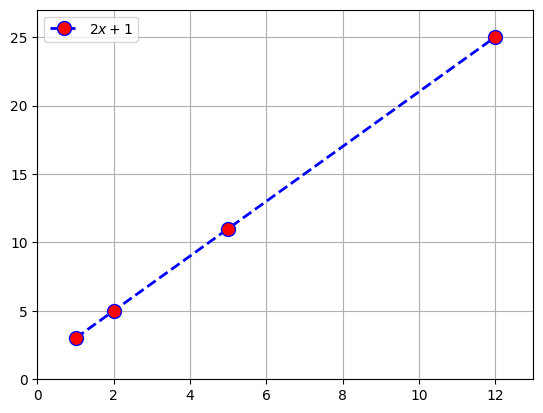

In [69]:
plt.plot(x, y, color='blue', linestyle='dashed',
         linewidth=2, marker='o', markersize=10, markerfacecolor='red', label='$2x+1$')

plt.xlim(0, max(x)+1)
plt.ylim(0, max(y)+2)
plt.legend()
plt.grid()
plt.show()


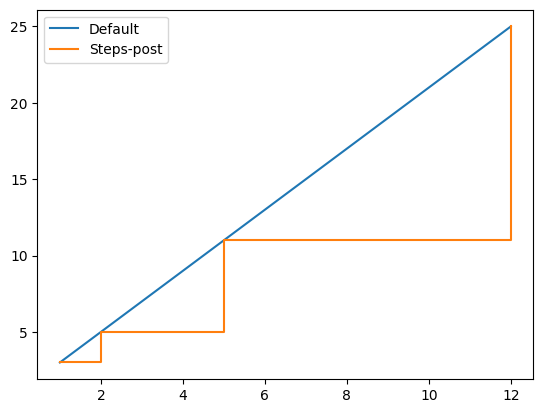

In [31]:
plt.plot(x, y, label='Default')
plt.plot(x, y, drawstyle='steps-post', label='Steps-post')

plt.legend(loc='best')
plt.show()

#### <a id='toc1_6_1_2_'></a>[Scatter](#toc0_)

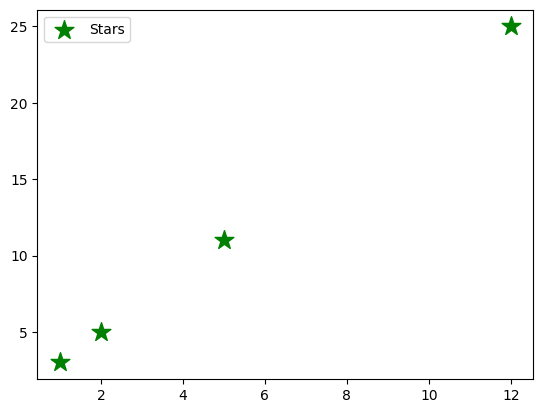

In [70]:
plt.scatter(x, y, color='green', marker='*', s=200, label='Stars')

plt.legend()
plt.show()

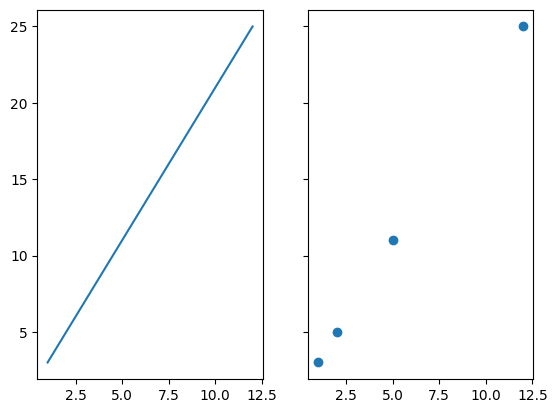

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               sharey=True)  # Share y axis on rigth plot (Remove axis on right plot)

ax1.plot(x, y)
ax2.scatter(x, y)

plt.show()


#### <a id='toc1_6_1_3_'></a>[Bar Plot](#toc0_)

In [191]:
course = ['C++', 'Python', 'PHP', 'Java']
score = [18, 20, 16, 17]

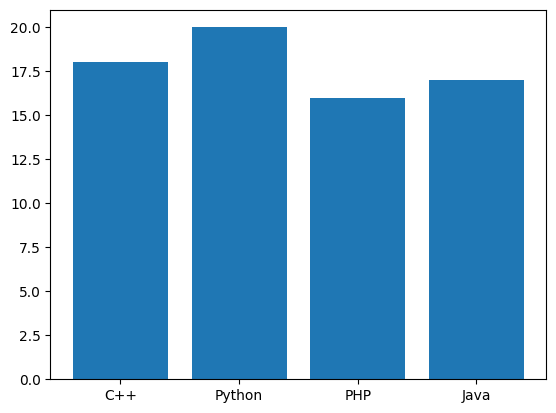

In [73]:
plt.bar(course, score)
plt.show()

Change bars color:

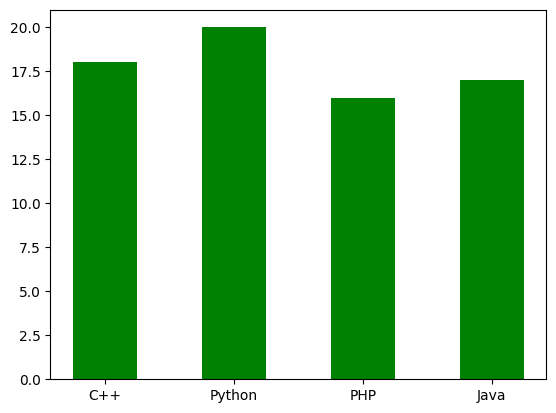

In [74]:
plt.bar(course, score, color='g', width=0.5)
plt.show()

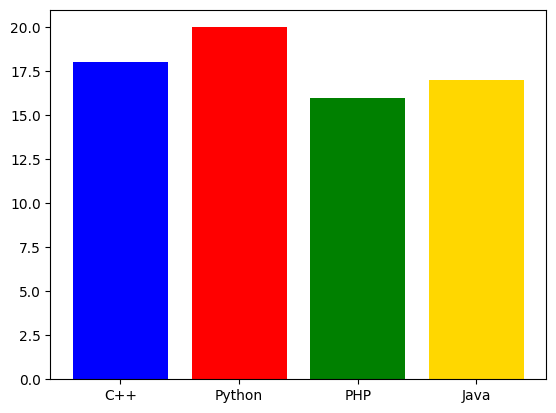

In [77]:
plt.bar(course, score, color=['b', 'r', 'g', '#FFD700'])
plt.show()

Change bars label:

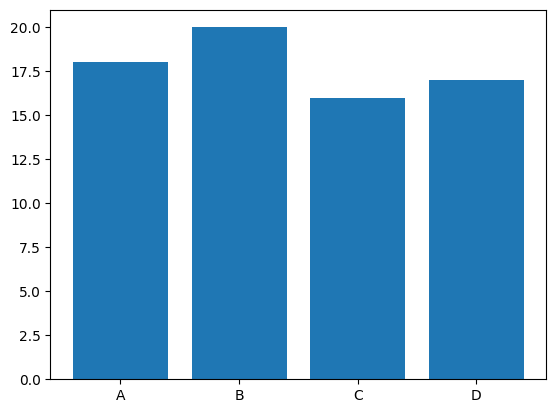

In [81]:
plt.bar(course, score, tick_label=['A', 'B', 'C', 'D'])
plt.show()

Other example:

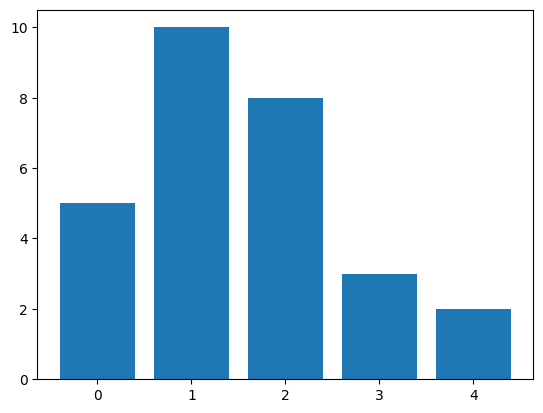

In [82]:
x = [0, 1, 2, 3, 4]
y = [5, 10, 8, 3, 2]

plt.bar(x, y)
plt.show()

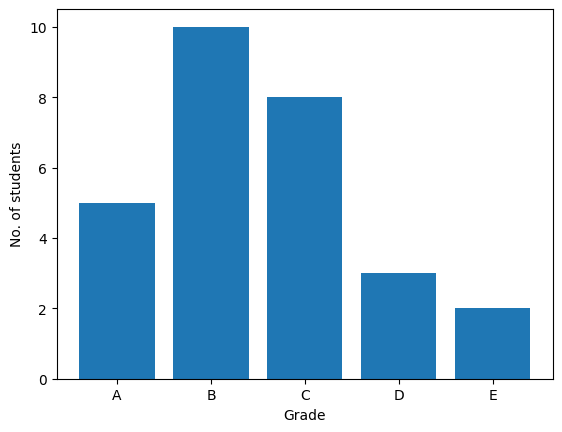

In [85]:
plt.bar(x, y)

plt.xticks(x, ['A', 'B', 'C', 'D', 'E'])
plt.xlabel('Grade')
plt.ylabel('No. of students')
plt.show()

#### <a id='toc1_6_1_4_'></a>[Histogram](#toc0_)

In [129]:
age = np.random.randint(low=1, high=100, size=200)
age

array([13, 85, 10, 68, 62,  7, 16, 10,  6, 93, 11, 49, 40, 42, 19, 66, 30,
       69, 25, 23, 85, 79, 58, 92,  6, 78, 24, 28, 43,  2, 10, 54, 97, 61,
       20, 14, 94, 68, 92, 31,  4, 98, 24, 97, 76, 59, 14, 91, 12, 26, 44,
       87, 11, 62, 75, 67, 11, 26, 46, 26, 46, 45, 53, 83, 63,  9, 40, 45,
       33, 75, 56,  8, 24, 39, 17, 80, 11, 34, 47, 84, 60, 92, 97, 44, 35,
       84, 42, 35, 24, 60, 97,  6,  5, 24,  5, 36, 31, 27,  5, 12, 96, 73,
       75,  1, 63, 60, 96, 32, 58, 57, 47, 23, 87, 81, 71, 27, 22, 23, 45,
       81, 83, 61, 13, 11, 85, 25, 44, 26,  5, 40, 31, 51, 11, 24, 14, 53,
        5, 97, 77, 43,  6, 60, 59, 50, 85, 37, 21,  6, 94, 79, 51, 16, 86,
       65,  5, 60, 99, 29, 53,  6, 92, 49, 80, 57, 76, 30, 69, 74, 21, 59,
       24, 68, 56, 75, 57, 39, 44, 34, 11, 69, 10, 91, 90, 31, 52, 58, 10,
       21, 49, 46, 25, 21, 32,  4, 50, 65, 59, 88,  2, 91])

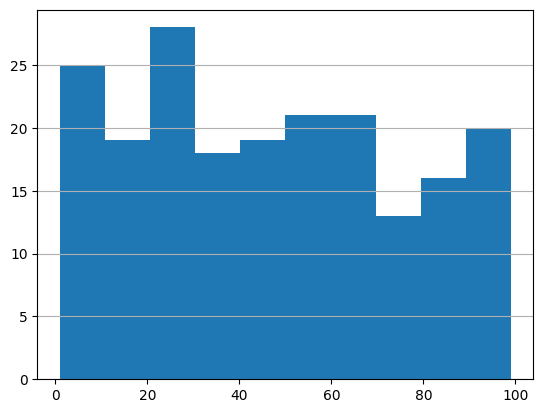

In [130]:
plt.hist(age)

plt.grid(axis='y')
plt.show()

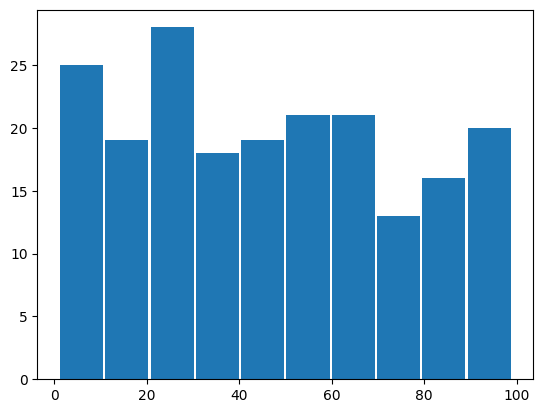

In [131]:
plt.hist(age, rwidth=0.95)  # add margin.
plt.show()

in above figure, bins length in 10.

Change bins size:

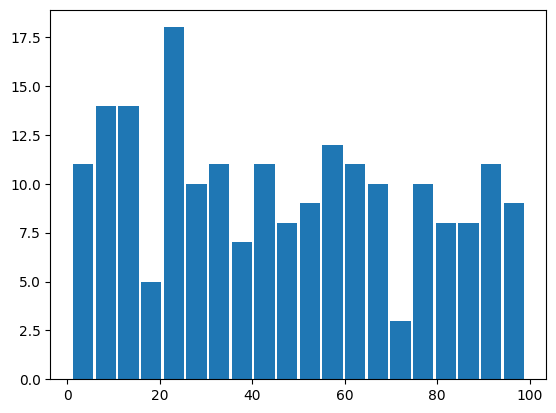

In [132]:
plt.hist(age, rwidth=0.9, bins=20)
plt.show()

Other example:

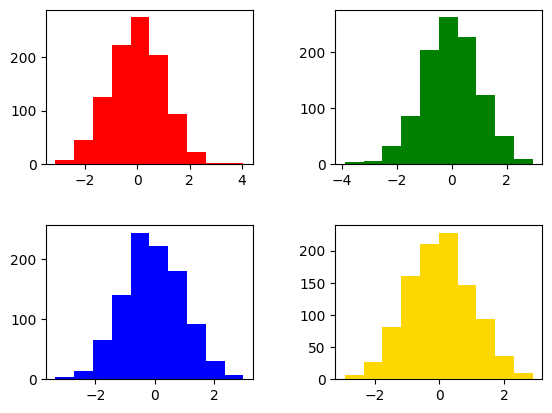

In [144]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(np.random.randn(1000), color='r')
ax[0, 1].hist(np.random.randn(1000), color='g')
ax[1, 0].hist(np.random.randn(1000), color='b')
ax[1, 1].hist(np.random.randn(1000), color='#FFD700')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # add space between each plots.
plt.show()

##### <a id='toc1_6_1_4_1_'></a>[Normal distribution density plot:](#toc0_)

In [160]:
mu = 300
sigma = 15
data = np.random.normal(loc=mu, scale=sigma, size=500)

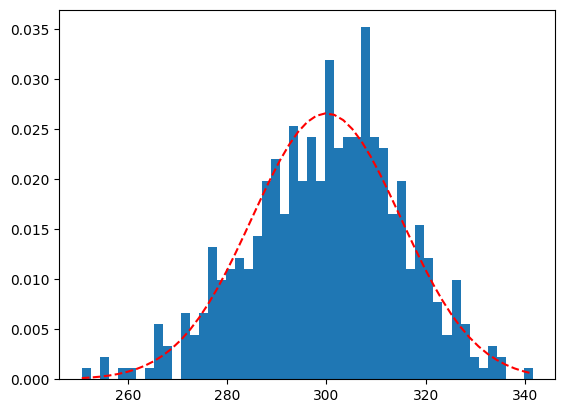

In [166]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=50, density=True)

# Normal dist plot:
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--r')

plt.show()

#### <a id='toc1_6_1_5_'></a>[Pie plot](#toc0_)

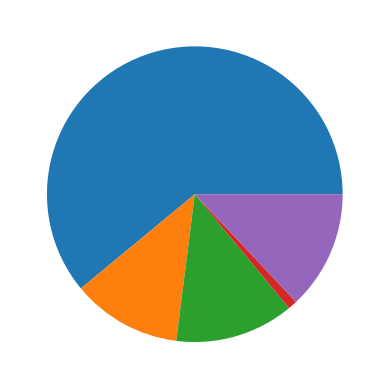

In [168]:
data = [61, 12, 13, 1, 13]

plt.pie(data)
plt.show()

Add options:

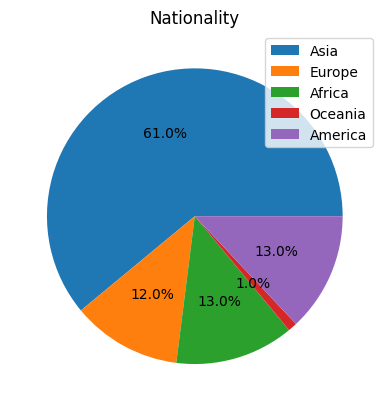

In [177]:
data = [61, 12, 13, 1, 13]  # by percentage
labels = ["Asia", "Europe", "Africa", "Oceania", "America" ]

p = plt.pie(data, autopct='%.1f%%')

plt.legend(p[0], labels)
plt.title('Nationality')
plt.show()

Other example:

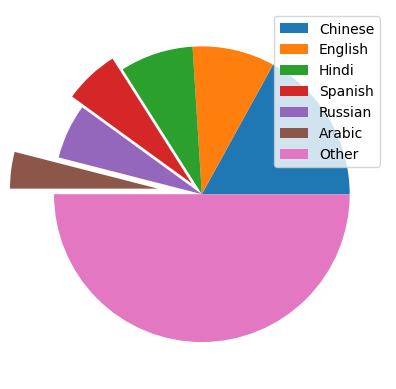

In [183]:
labels = ["Chinese", "English", "Hindi",
          "Spanish", "Russian", "Arabic", "Other"]
data = [17, 9, 8, 6, 6, 4, 50]  # by percentage

p = plt.pie(data, explode=[0, 0, 0, 0.1, 0, 0.3, 0])

plt.legend(p[0], labels)
plt.show()


Other example _(Change legend location)_:

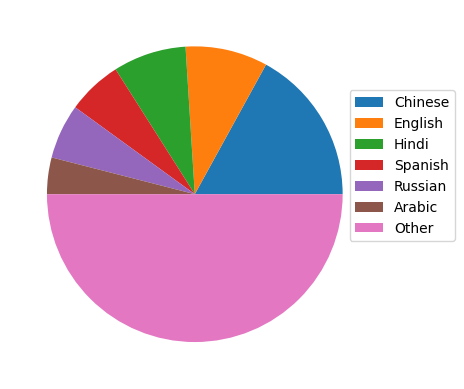

In [184]:
labels = ["Chinese", "English", "Hindi",
          "Spanish", "Russian", "Arabic", "Other"]
d = [17, 9, 8, 6, 6, 4, 50]

p = plt.pie(d)

plt.legend(p[0], labels, bbox_to_anchor=(0.9, 0.8))
plt.show()

#### <a id='toc1_6_1_6_'></a>[Box plot](#toc0_)

<div style="text-align:center">
    <img src="img/boxplot.jpg"/>
</div>

In [194]:
score = [1, 3, 6, 7, 7, 7, 8, 9, 9, 10, 10, 10, 13, 13, 17, 20]

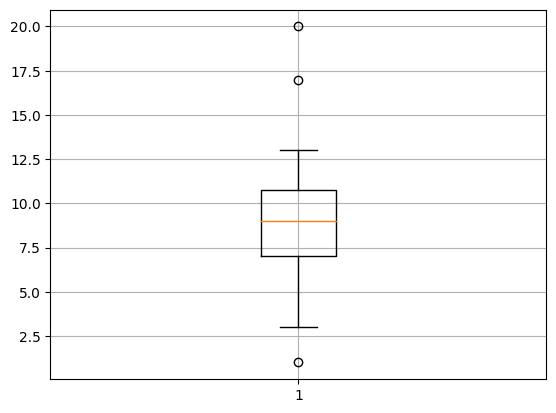

In [197]:
plt.boxplot(score)
 
plt.grid()
plt.show()

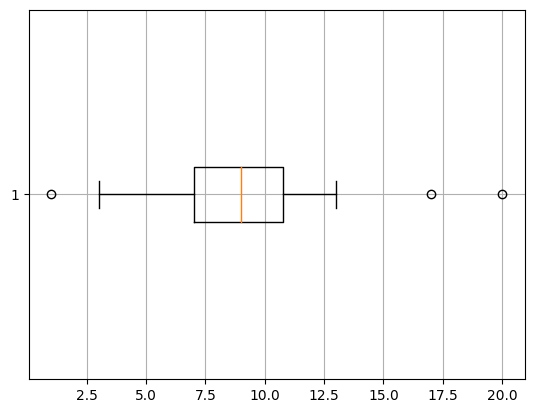

In [198]:
plt.boxplot(score, vert=False)
   
plt.grid()
plt.show()

In [206]:
q1 = np.quantile(score, .25) 
q2 = np.quantile(score, .50)
q3 = np.quantile(score, .75)
iqr = q3 - q1
lv = q1 - 1.5 * iqr 
hv = q3 + 1.5 * iqr

print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)
print('IQR:', iqr)
print('LV:', lv)
print('HV:', hv)

Q1: 7.0
Q2: 9.0
Q3: 10.75
IQR: 3.75
LV: 1.375
HV: 16.375


Other example:

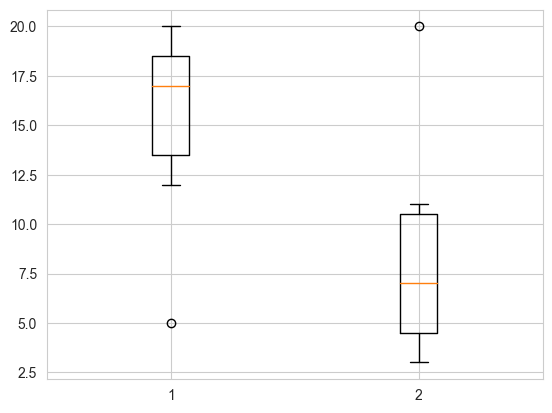

In [261]:
score1 = [5, 12, 15, 17, 18, 19, 20]
score2 = [3, 4, 5, 7, 10, 11, 20]
data = (np.array(score1), np.array(score2))

plt.boxplot(data)  
plt.show()

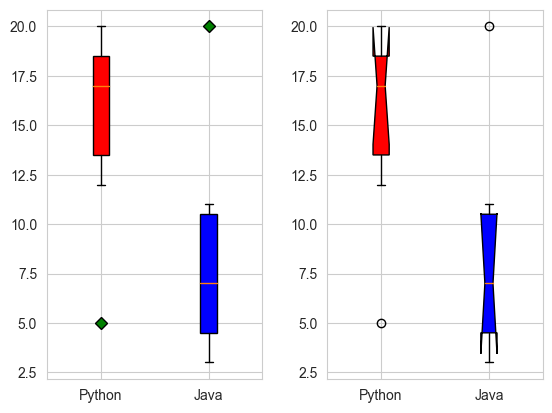

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2)

f = dict(markerfacecolor='g', marker='D')  # for change outlire points shape.

box1 = ax1.boxplot(data, patch_artist=True, labels=['Python', 'Java'], flierprops=f)  
box2 = ax2.boxplot(data, patch_artist=True, labels=['Python', 'Java'], notch=True) # notch: change box shape.

# Colorazing:
for box in (box1, box2):
    for p, color in zip(box['boxes'], ['red', 'blue']):
        p.set_facecolor(color)


plt.subplots_adjust(wspace=0.3)  # add space between plots.
plt.show()

### <a id='toc1_6_2_'></a>[Plotting with pandas](#toc0_)

#### <a id='toc1_6_2_1_'></a>[Bar plot](#toc0_)

In [287]:
data = {'speed': [40, 48, 52, 88], 'lifespan': [70, 1.5, 25, 28]}
df = pd.DataFrame(data, index=['elephant', 'rabbit', 'giraffe', 'horse'])
df

,speed,lifespan
elephant,40,70.0
rabbit,48,1.5
giraffe,52,25.0
horse,88,28.0


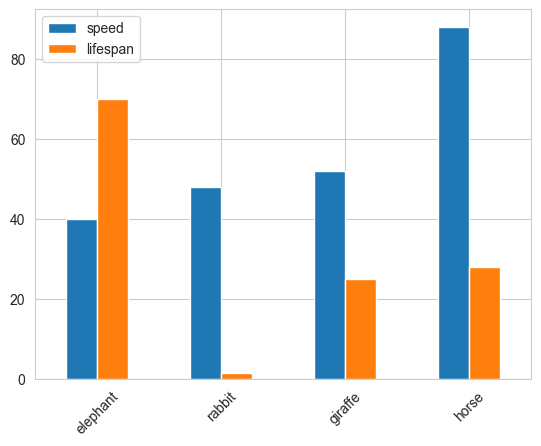

In [288]:
df.plot.bar(rot=45)
plt.show()

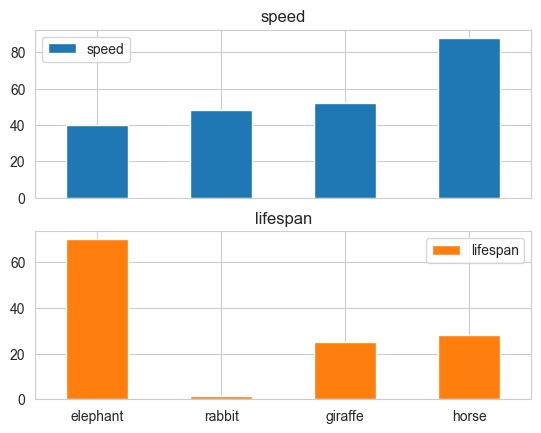

In [289]:
df.plot.bar(subplots=True, rot=0)
plt.show()

#### <a id='toc1_6_2_2_'></a>[Box plot](#toc0_)

In [291]:
data = [
    ['men', 155], ['men', 158], ['men', 160], ['men', 161], ['men', 162],
    ['men', 165], ['men', 169], ['men', 170], ['men', 173], ['men', 175],
    ['men', 180], ['men', 185], ['men', 185], ['men', 190],
    ['women', 145], ['women', 150], ['women', 156], ['women', 157],
    ['women', 158], ['women', 150], ['women', 156], ['women', 158],
    ['women', 160], ['women', 161], ['women', 178]
]

frame = pd.DataFrame(data, columns=['gender', 'height'])
frame

,gender,height
0,men,155
1,men,158
2,men,160
3,men,161
4,men,162
5,men,165
6,men,169
7,men,170
8,men,173
9,men,175


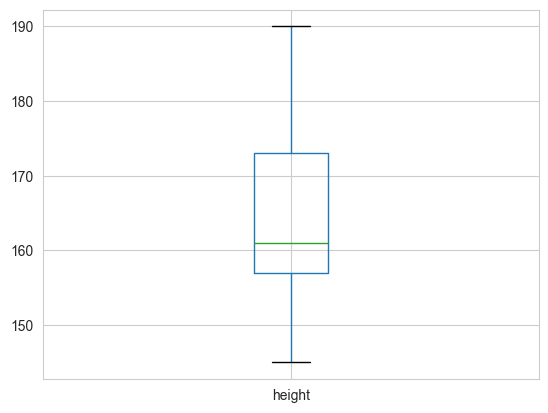

In [293]:
frame.boxplot()  # box plot on all data. 
plt.show()

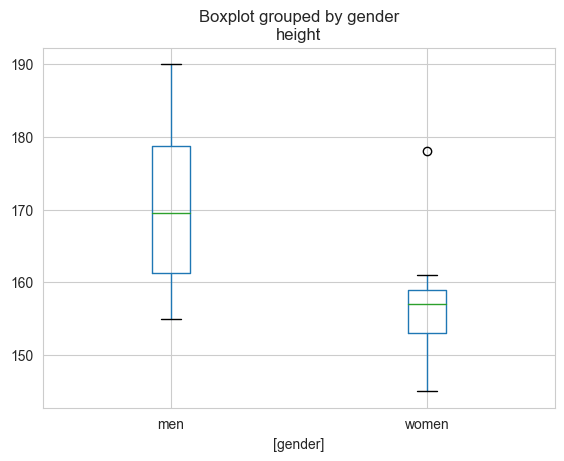

In [295]:
frame.boxplot(by=['gender'])    
plt.show()

Other example:

In [297]:
gender = [np.random.choice(['male', 'female']) for _ in range(50)]
age = [x for x in np.random.randint(20, 70, 50)]

dfage = pd.DataFrame({'gender': gender, 'age': age})
dfage.head()

,gender,age
0,female,37
1,male,30
2,male,52
3,female,69
4,male,61


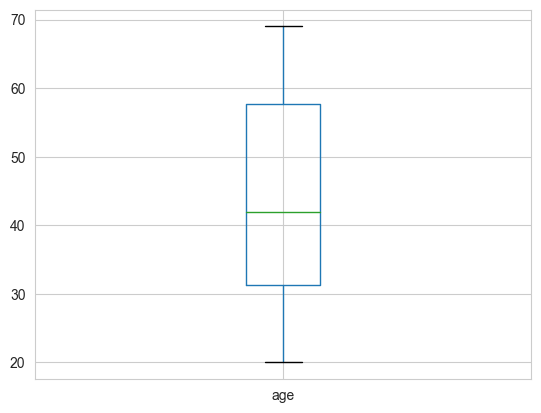

In [298]:
dfage.boxplot()    
plt.show()

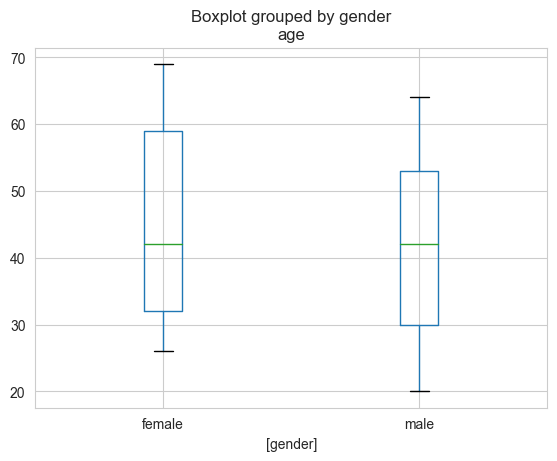

In [299]:
dfage.boxplot(by=['gender'])    
plt.show()

#### <a id='toc1_6_2_3_'></a>[Box plot with `plot.box`](#toc0_)

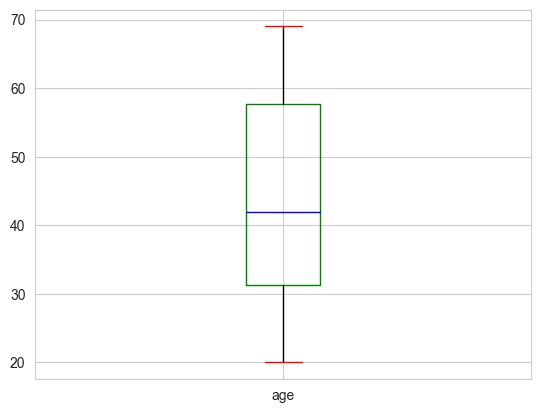

In [303]:
colors = {'boxes': 'Green',
     'whiskers': 'black',
     'medians': 'Blue',
     'caps': 'red'}  # Coloraze.

dfage.plot.box(color=colors)
plt.show()

### <a id='toc1_6_3_'></a>[Ploting with Seaborn _(is beautiful)_](#toc0_)

In [304]:
import seaborn as sns

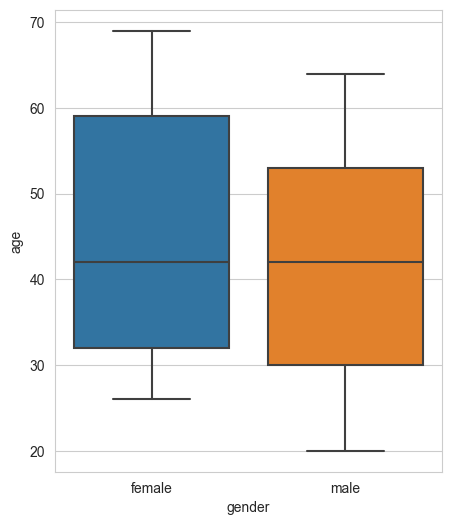

In [309]:
plt.figure(figsize=(5, 6))  

sns.boxplot(x='gender', y='age', data=dfage)
plt.show()

#### <a id='toc1_6_3_1_'></a>[iris dataset example:](#toc0_)

In [310]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


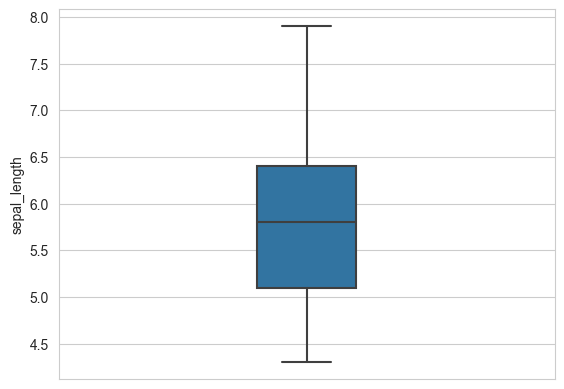

In [314]:
sns.boxplot(y=df["sepal_length"], width=0.2)  # width: change box width.
plt.show()

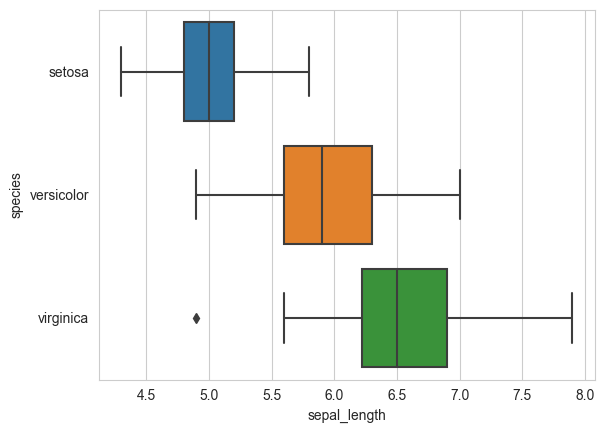

In [315]:
sns.boxplot( x=df["sepal_length"], y=df["species"] );

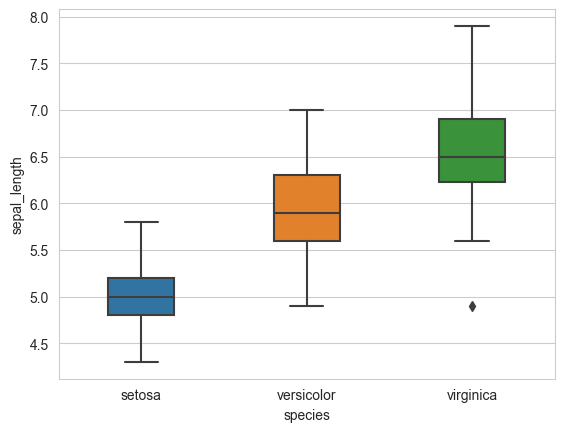

In [320]:
# cahnge x and y
sns.boxplot(x=df["species"], y=df["sepal_length"], width=0.4);

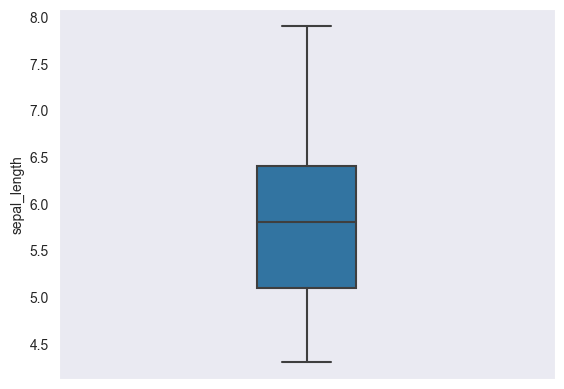

In [321]:
sns.set_style("dark")  # dark, whitegrid.

sns.boxplot(y=df["sepal_length"], width=0.2);  

##### <a id='toc1_6_3_1_1_'></a>[Violin plot](#toc0_)

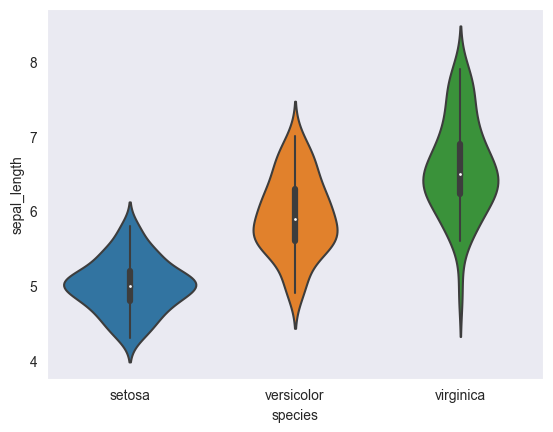

In [322]:
sns.violinplot(x=df["species"], y=df["sepal_length"])
plt.show()

## <a id='toc1_7_'></a>[Group By](#toc0_)